In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate
import seaborn as sns

In [2]:
#https://stackoverflow.com/questions/46135839/auto-detect-the-delimiter-in-a-csv-file-using-pd-read-csv
import csv

def get_delimiter(file_path, bytes = 4096):
    sniffer = csv.Sniffer()
    data = open(file_path, "r").read(bytes)
    delimiter = sniffer.sniff(data).delimiter
    return delimiter

In [3]:
def read_csv_file(file_path):
    try:
        for encoding in ['latin1', 'ISO-8859-1', 'utf-8']:
            delimiter= get_delimiter(file_path)
            try:
                df = pd.read_csv(file_path, low_memory=False, encoding=encoding, delimiter=delimiter)
                return df, True, None
            except (UnicodeDecodeError, pd.errors.ParserError) as e:
                pass  
        return None, False, f"Impossible de lire {file_path}."
    except FileNotFoundError as e:
        return None, False, e

In [8]:
years = list(range(2005, 2023, 1))
prefixes= ['vehicules']
dataframes= []

for prefix in prefixes:
    datasets = []
    for year in years:
        connector = '_' if year <= 2016 else '-'
        file_name = f'data/raw/{prefix}{connector}{year}.csv'
        df, success, error = read_csv_file(file_name)
        if success:
            key= {file_name: df}
            datasets.append(key)
        else:
            print(f'{file_name} : {error}')
    dataframes.append(datasets)

print(f'Total datasets: {len(dataframes)}.')

for prefix, df_list in zip(prefixes, dataframes):
    print(f'{prefix}: {len(df_list)}.')

#Correction à la main des deux fichiers pour lesquels il y avait une erreur de frappe dans le nom.


Total datasets: 1.
vehicules: 18.


In [ ]:
def analyze_numeric(datasets_list, num_cols=3):
    for df_list in datasets_list:
        for item in df_list:
            for file_name, df in item.items():
                

#pour chaque colonne

In [ ]:
#finalement j'utilise matplotlib car plotly est trop lent ici
for df_list in dataframes:
    for item in df_list:
        for file_name, df in item.items():
            print(f'{file_name} - {df.shape[0]} rows')
            
            
            numeric_cols = df.select_dtypes(include=['number']).columns

            num_cols = 3  
            num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 

            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
            axes = axes.flatten()

            for i, col in enumerate(numeric_cols):
                df.boxplot(column=col, ax=axes[i])
                axes[i].set_title(col)

            for i in range(len(numeric_cols), len(axes)):
                fig.delaxes(axes[i])

            plt.tight_layout()
            plt.show()

Categorical Analysis for vehicules - data/raw/vehicules_2005.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              33 |       149731 |             0 |
+----------+---------+-----------------+--------------+---------------+


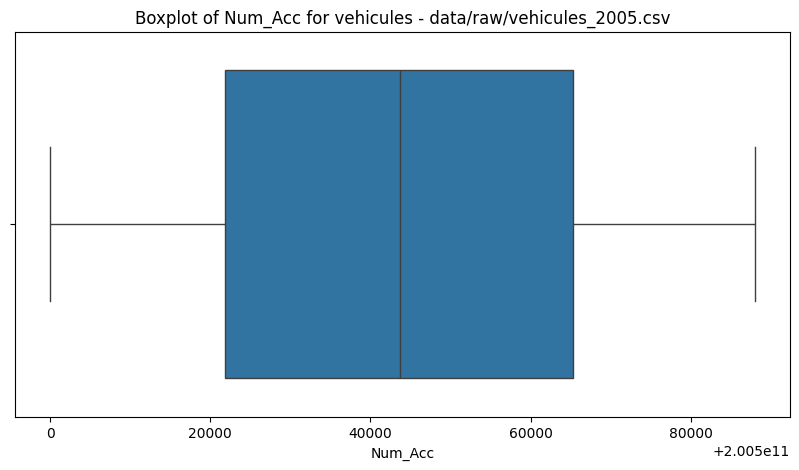

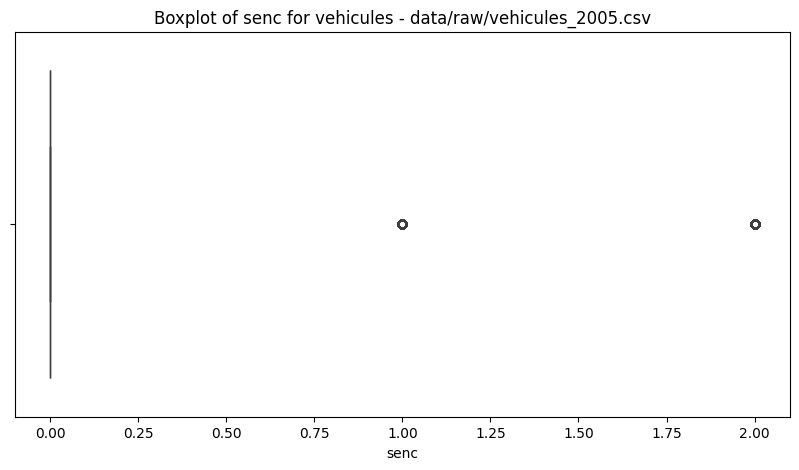

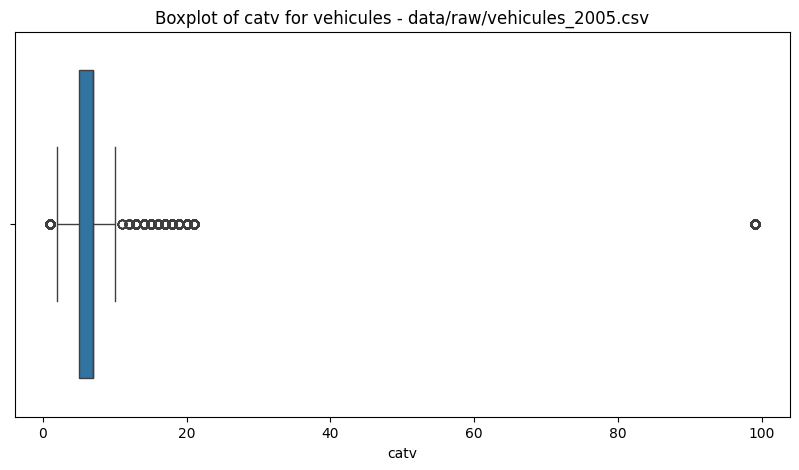

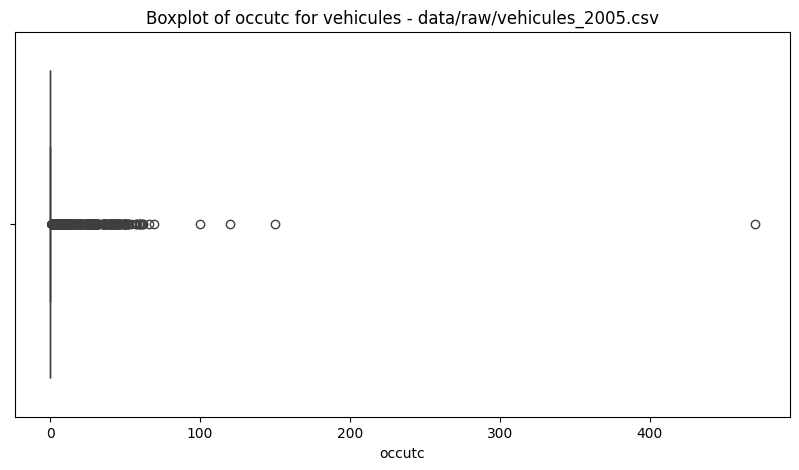

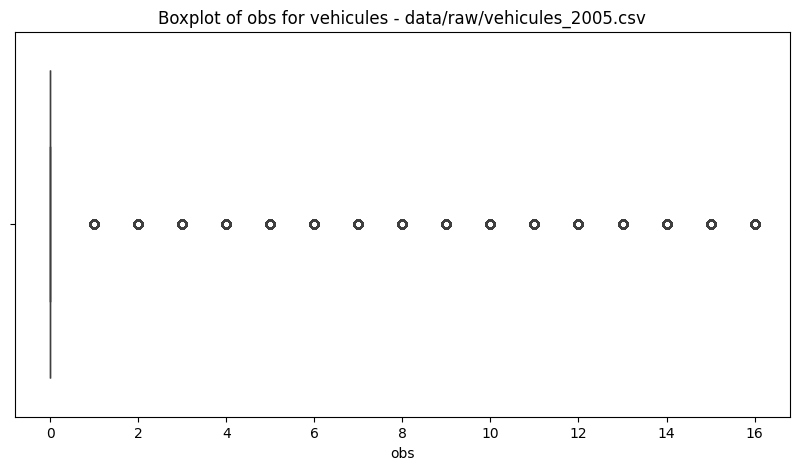

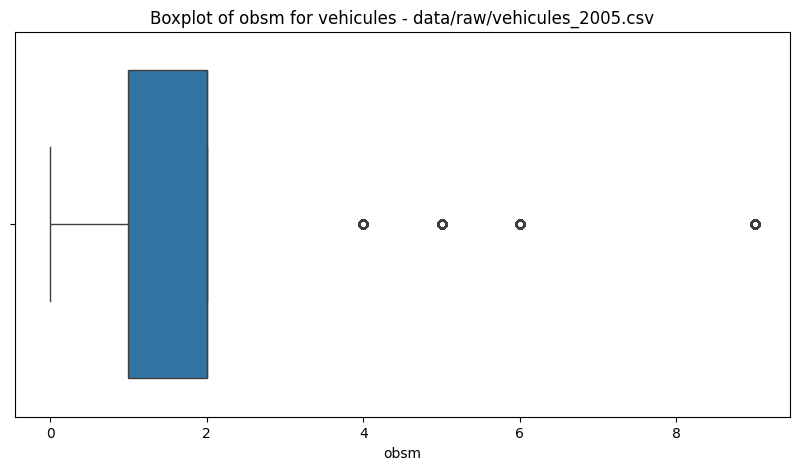

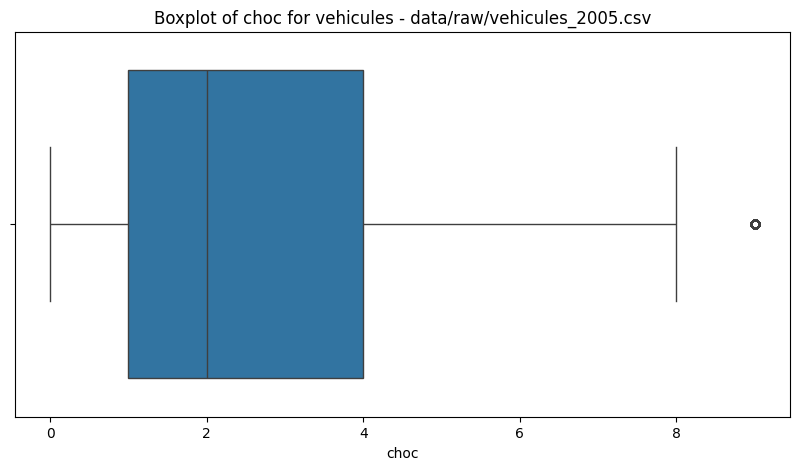

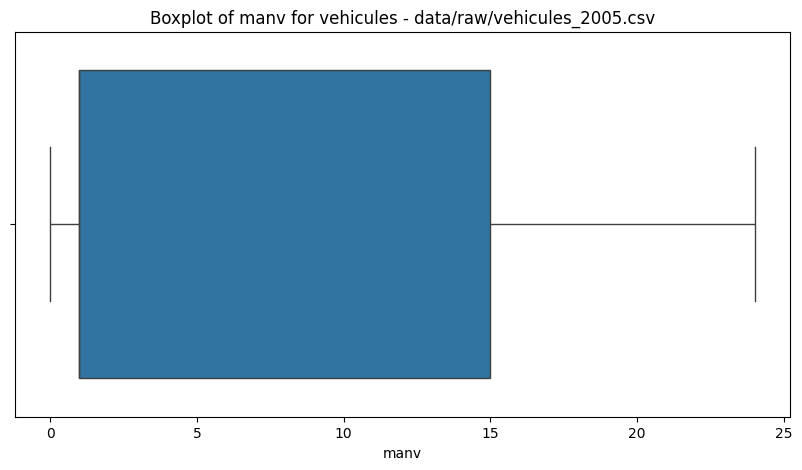

Categorical Analysis for vehicules - data/raw/vehicules_2006.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              72 |       142228 |             0 |
+----------+---------+-----------------+--------------+---------------+


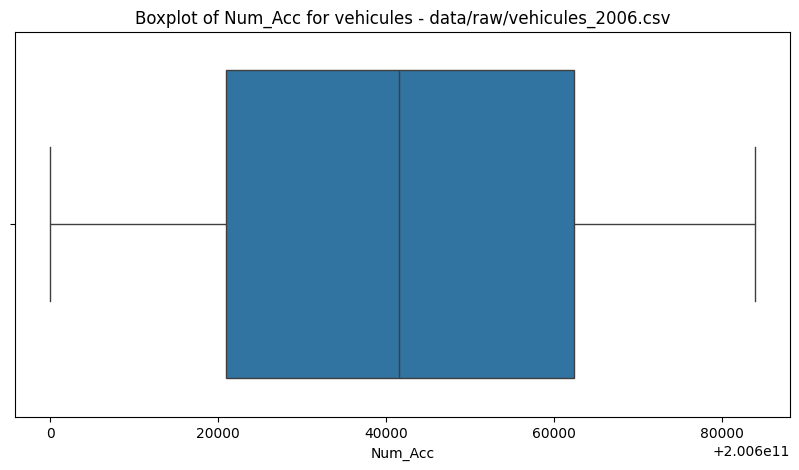

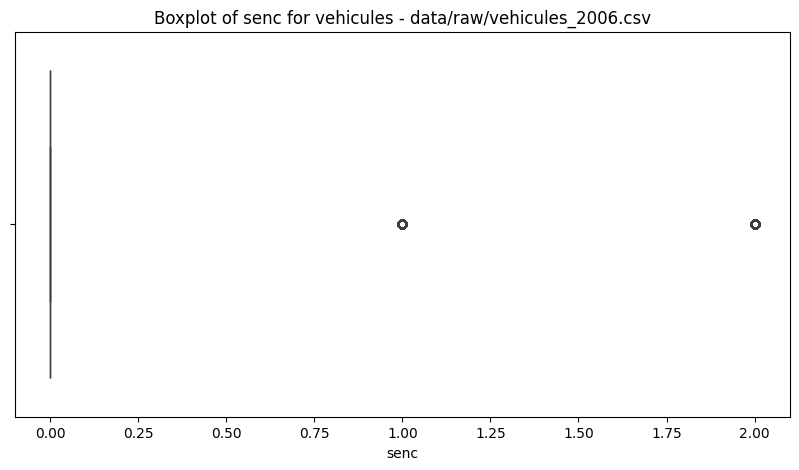

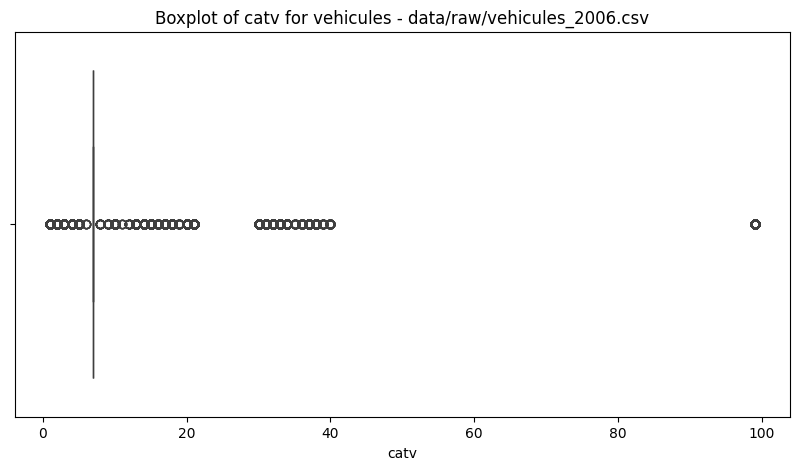

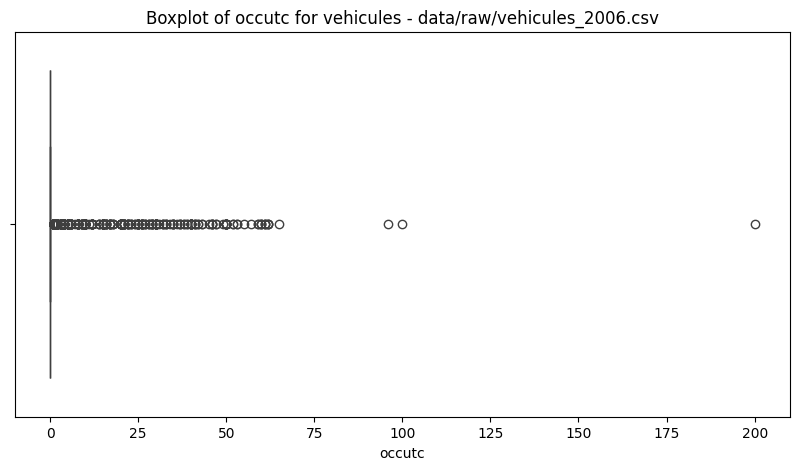

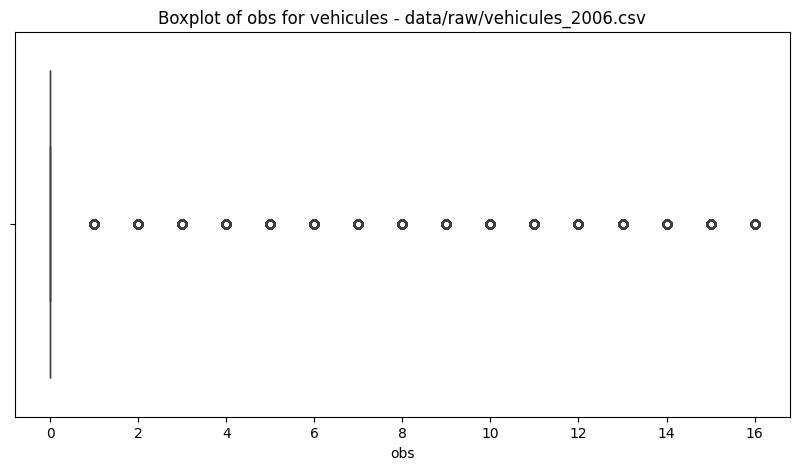

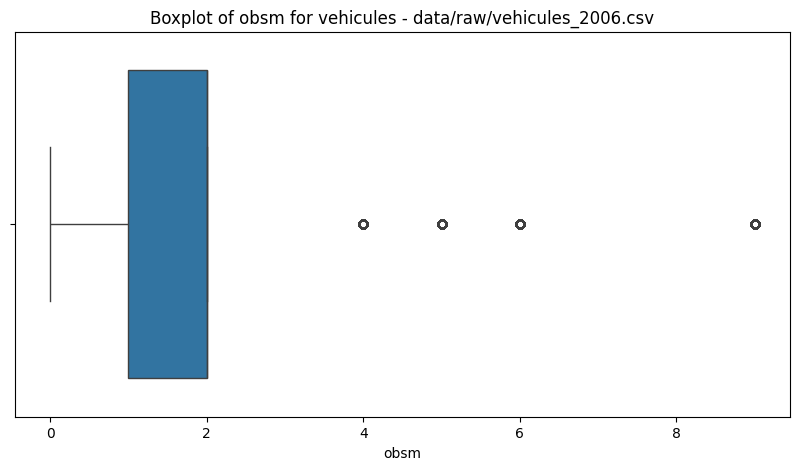

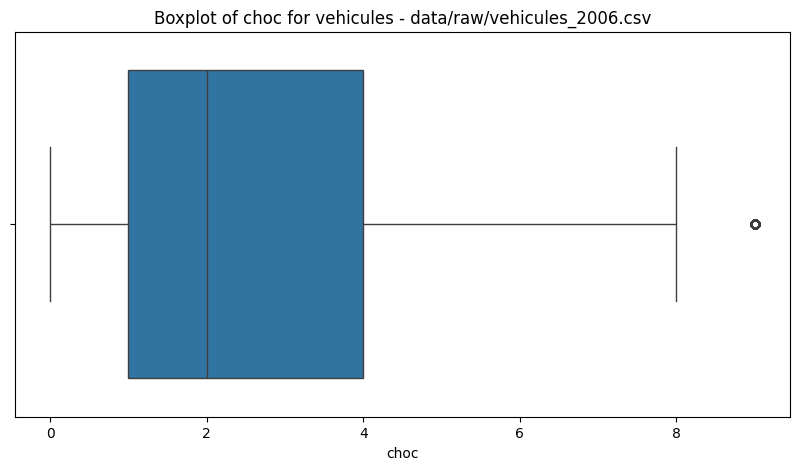

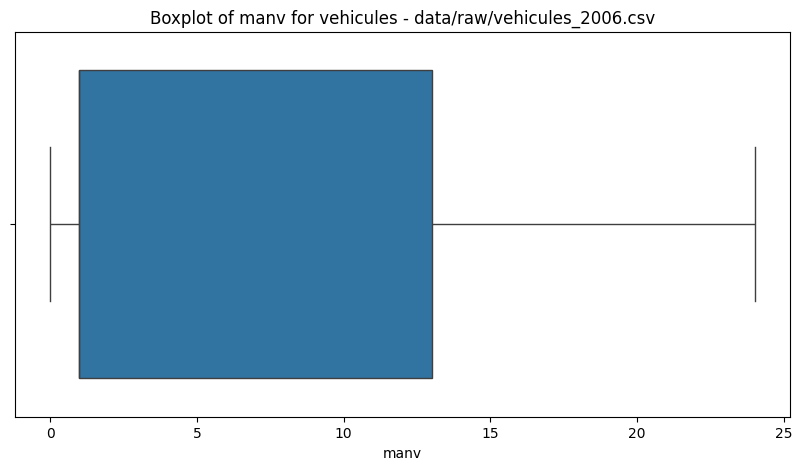

Categorical Analysis for vehicules - data/raw/vehicules_2007.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              38 |       144092 |             0 |
+----------+---------+-----------------+--------------+---------------+


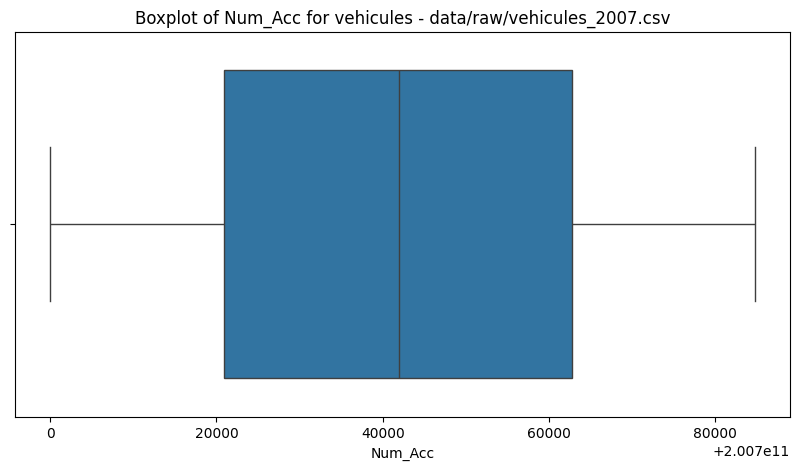

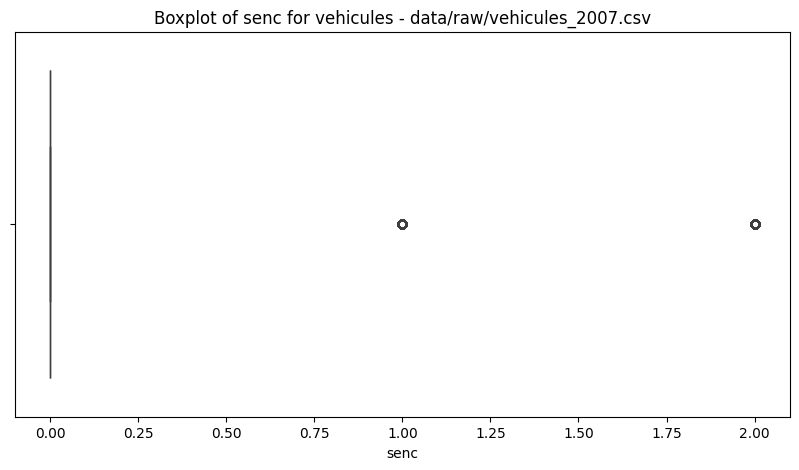

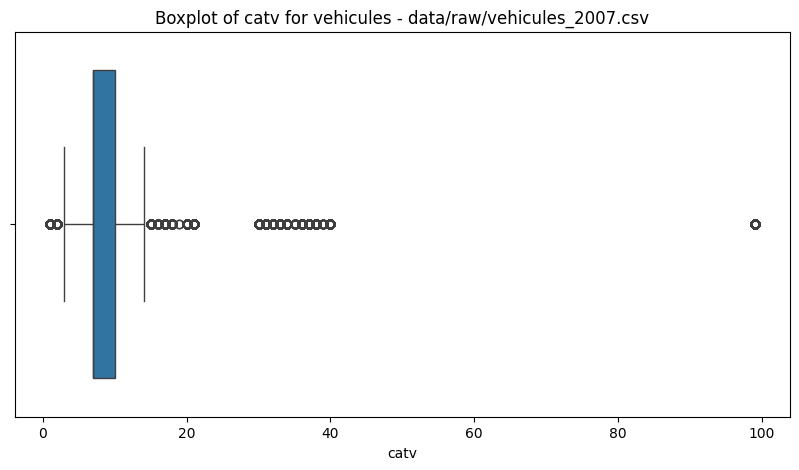

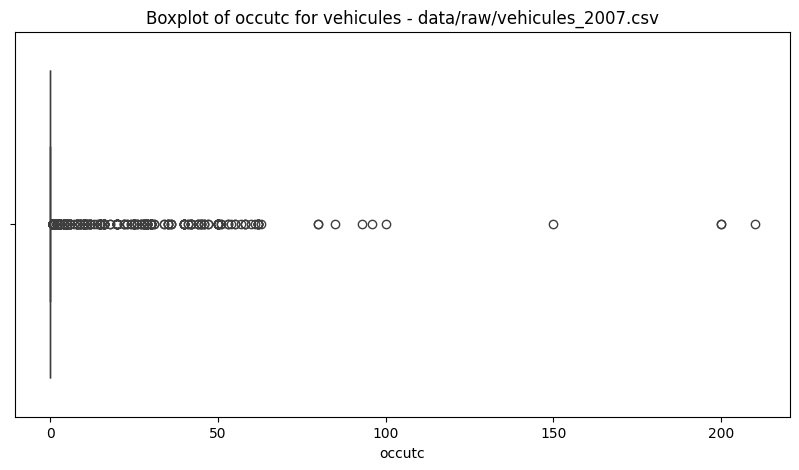

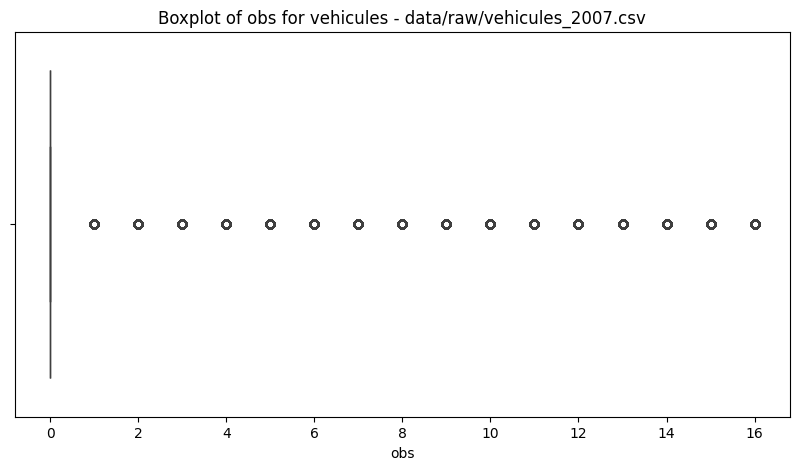

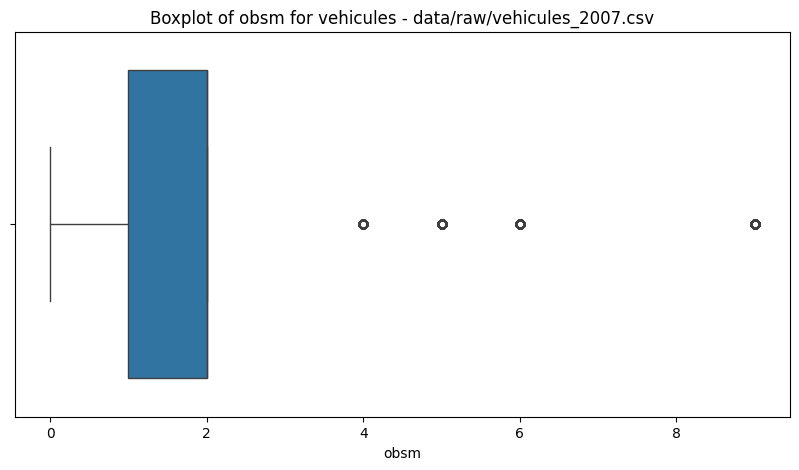

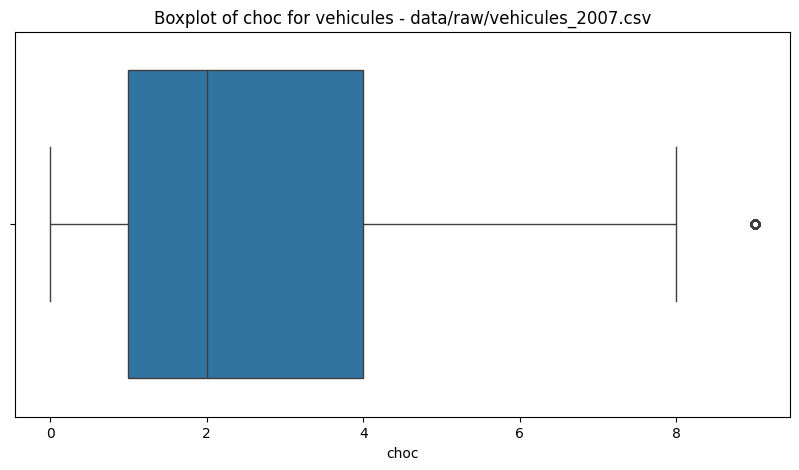

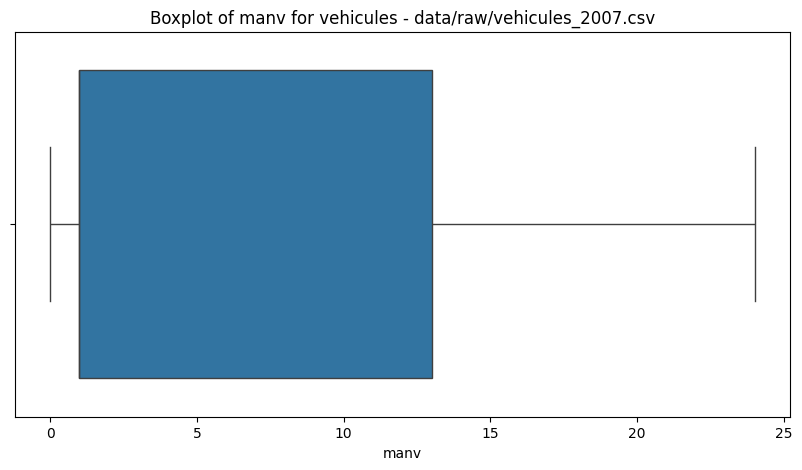

Categorical Analysis for vehicules - data/raw/vehicules_2008.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              42 |       131006 |             0 |
+----------+---------+-----------------+--------------+---------------+


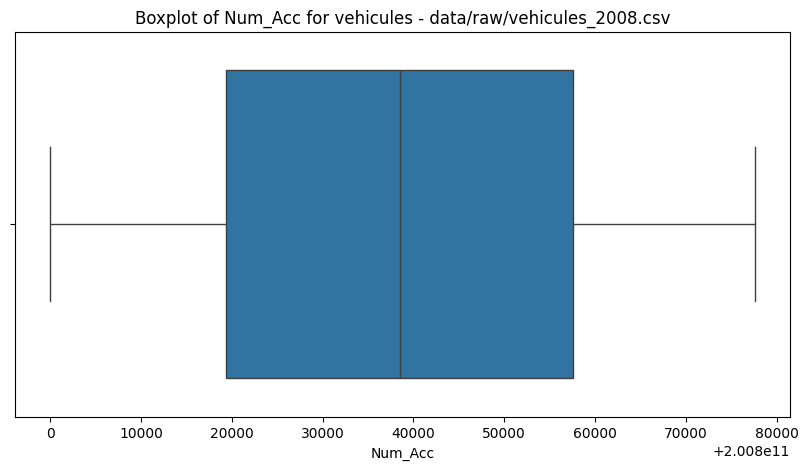

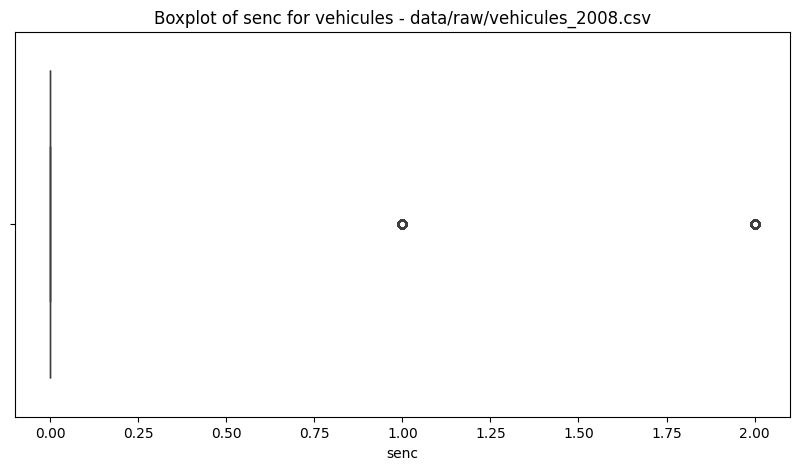

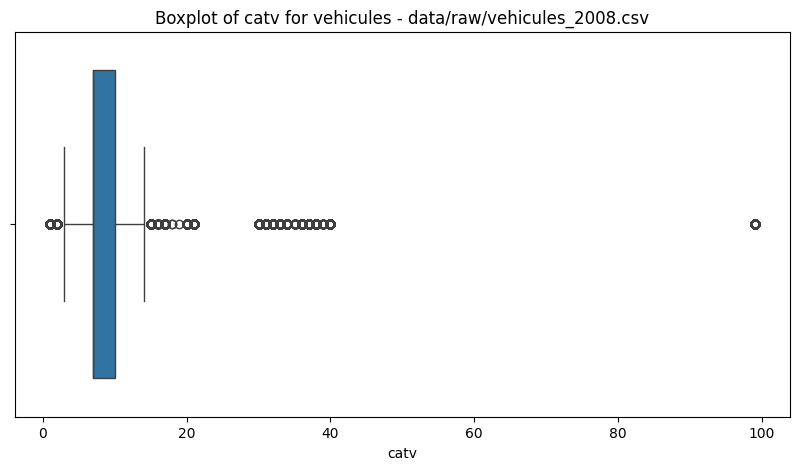

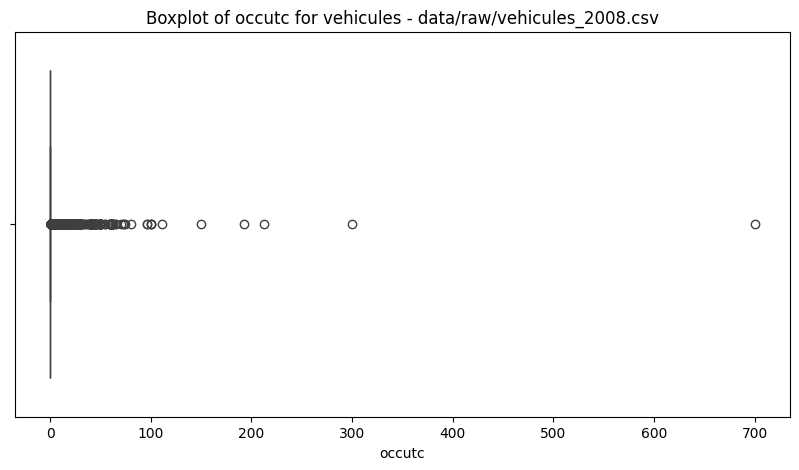

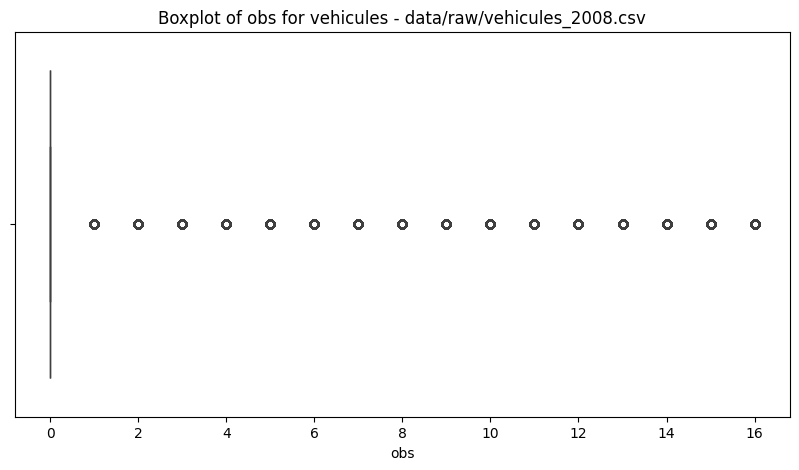

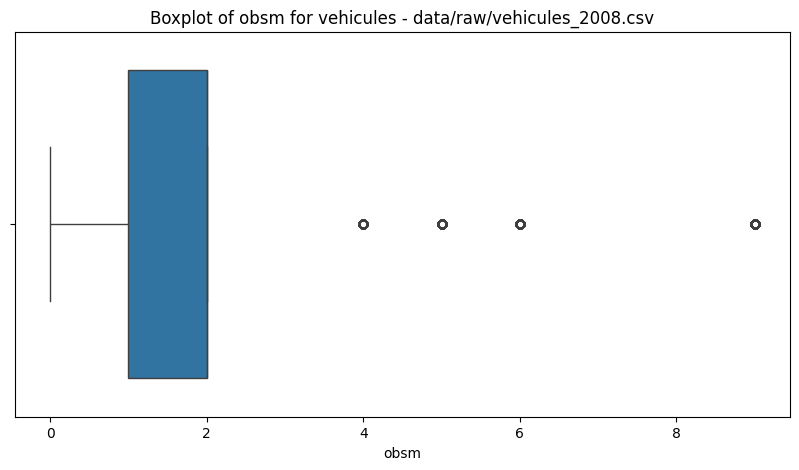

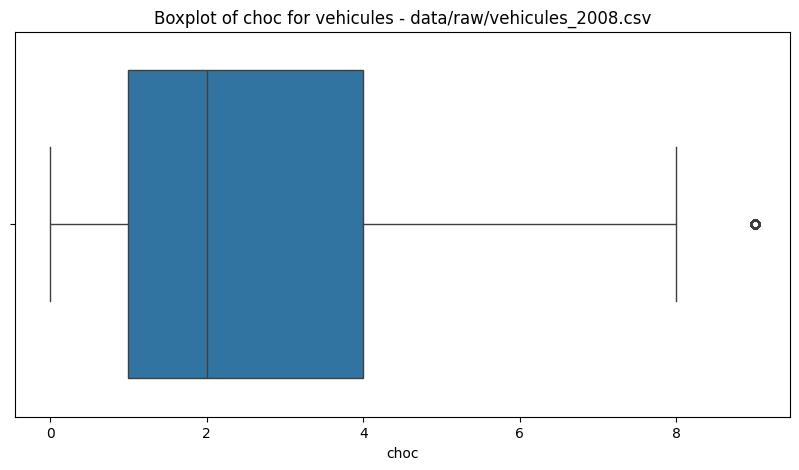

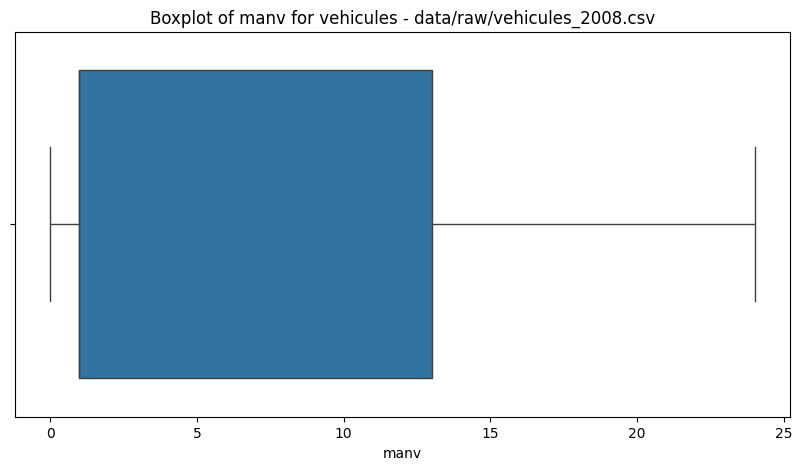

Categorical Analysis for vehicules - data/raw/vehicules_2009.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              65 |       126282 |             0 |
+----------+---------+-----------------+--------------+---------------+


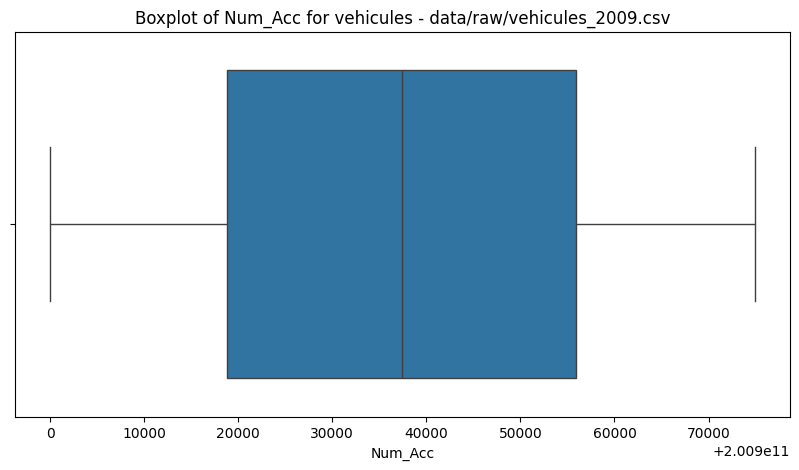

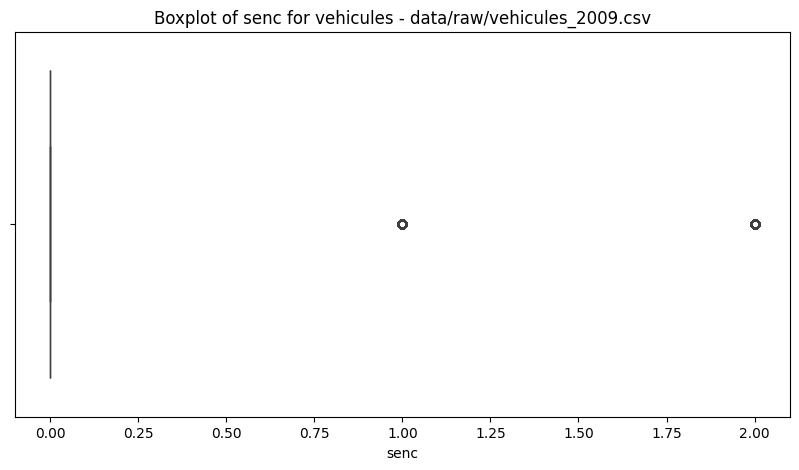

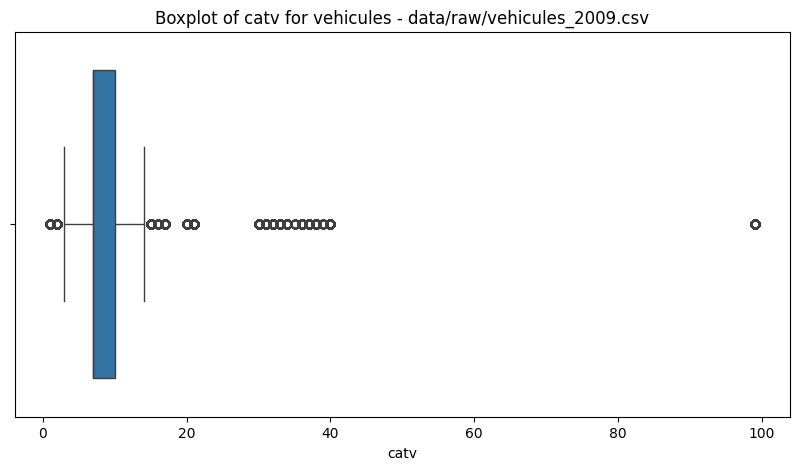

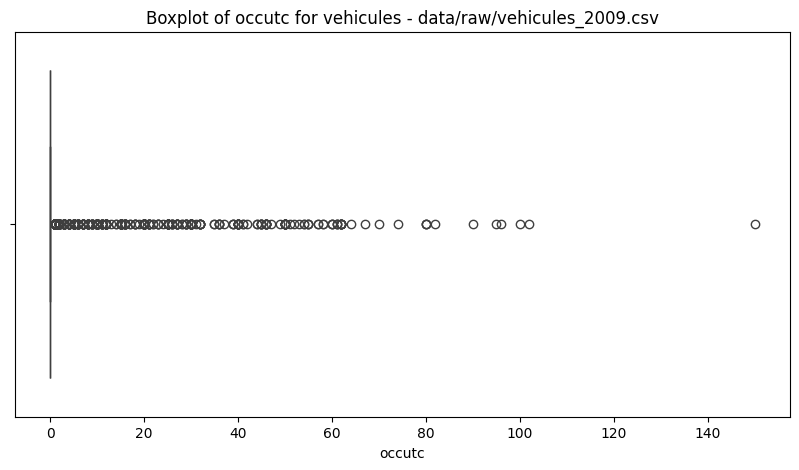

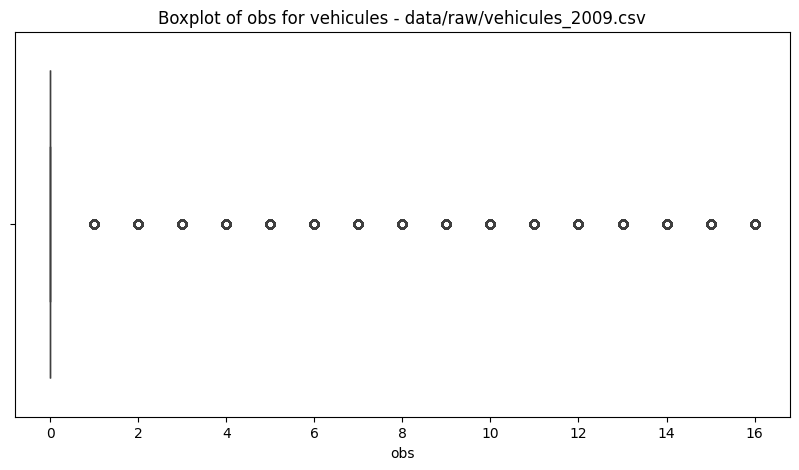

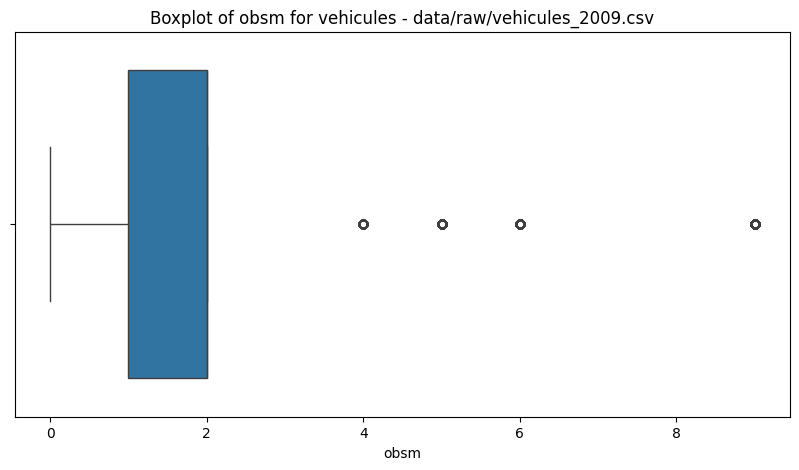

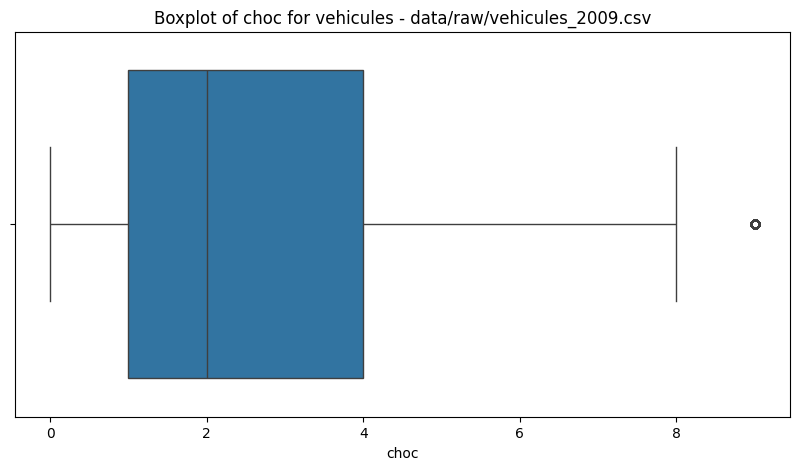

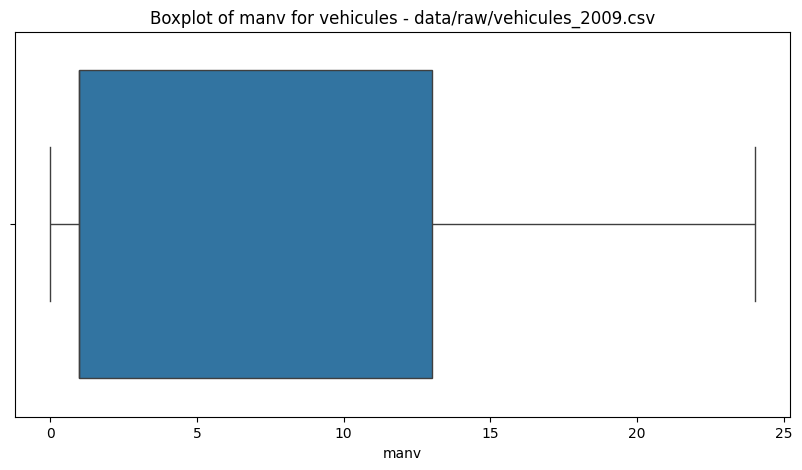

Categorical Analysis for vehicules - data/raw/vehicules_2010.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              51 |       117692 |             0 |
+----------+---------+-----------------+--------------+---------------+


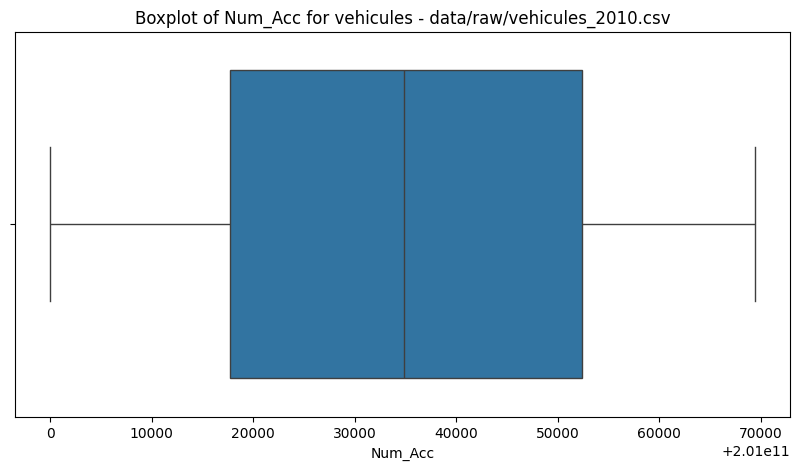

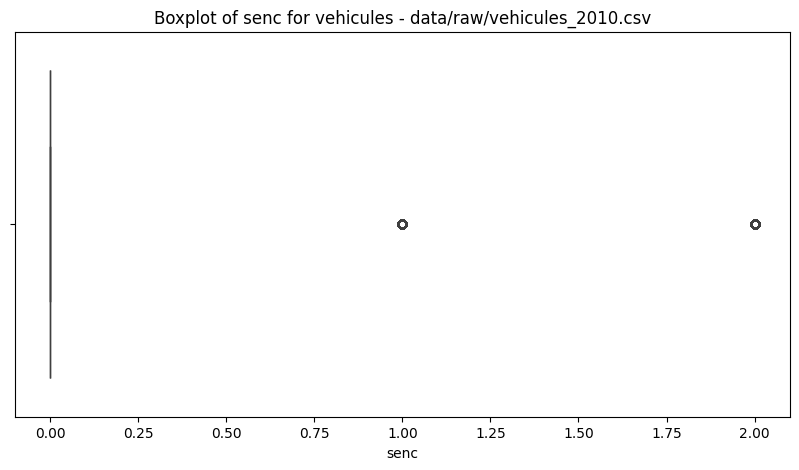

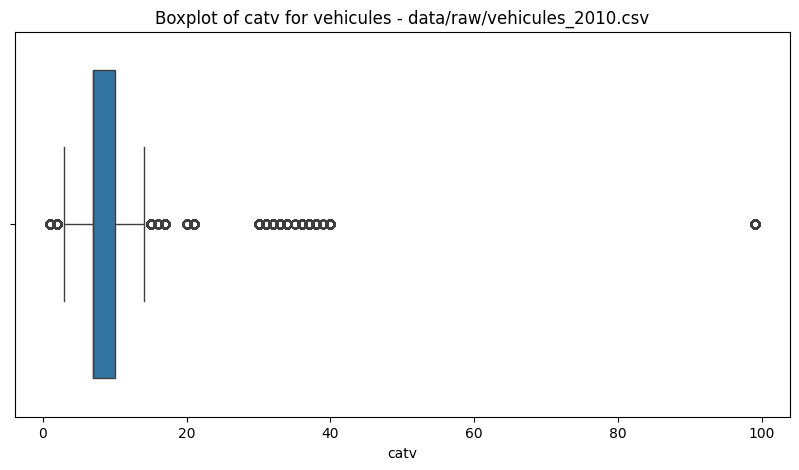

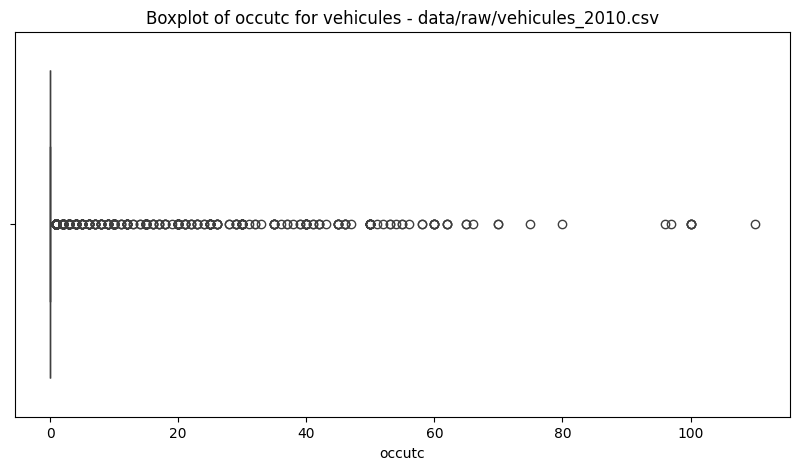

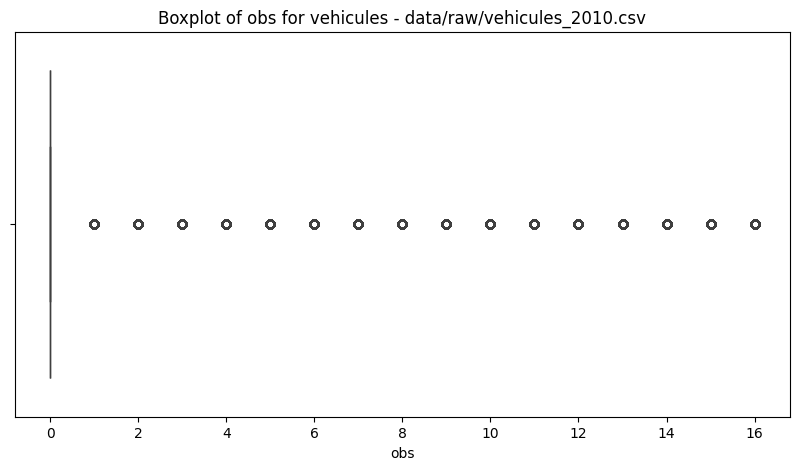

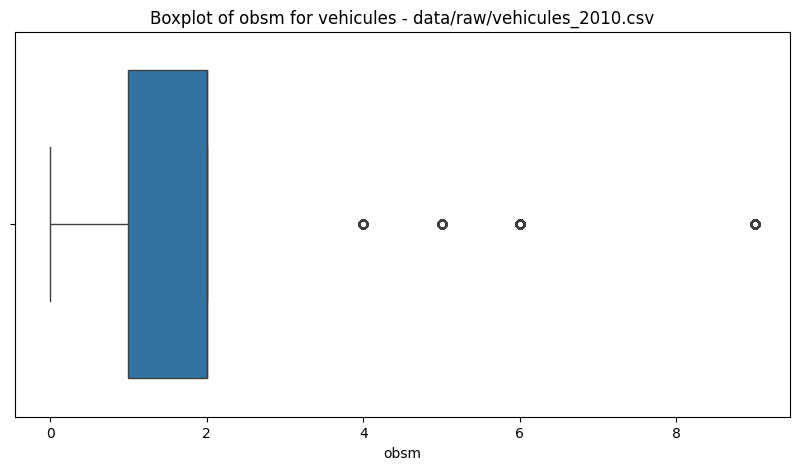

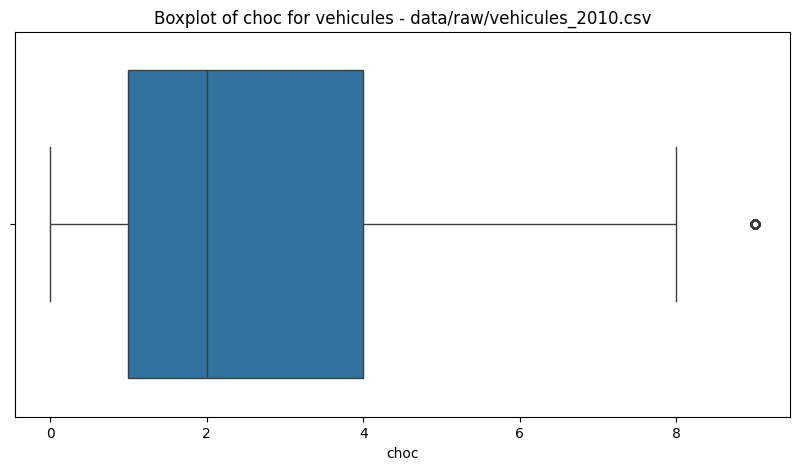

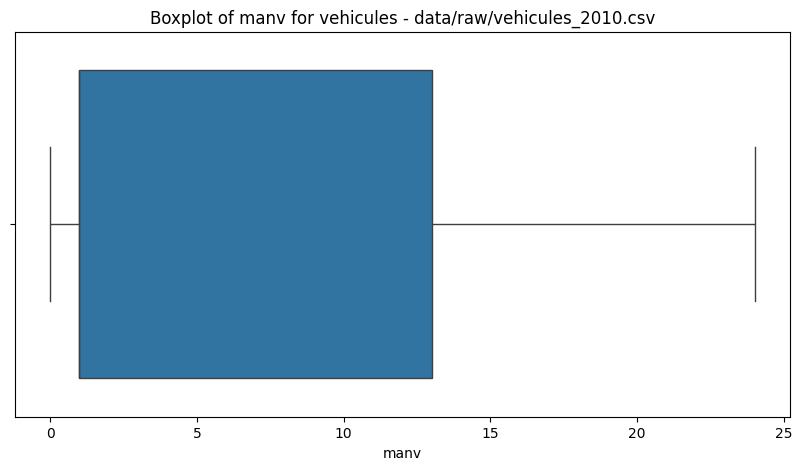

Categorical Analysis for vehicules - data/raw/vehicules_2011.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              71 |       113783 |             0 |
+----------+---------+-----------------+--------------+---------------+


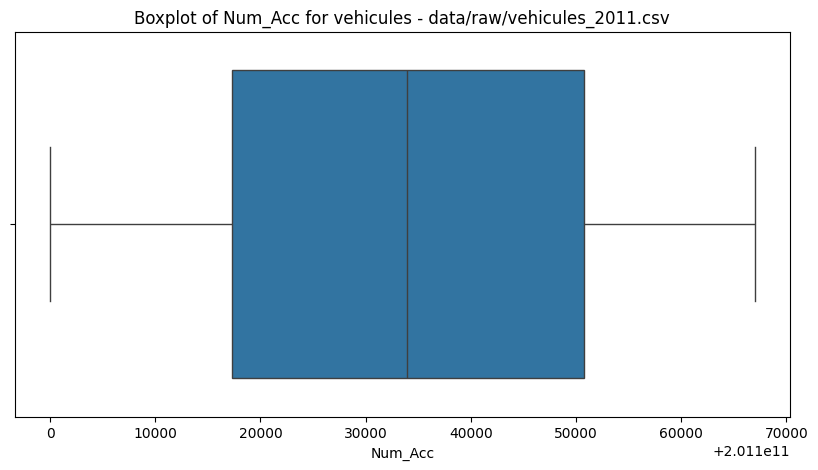

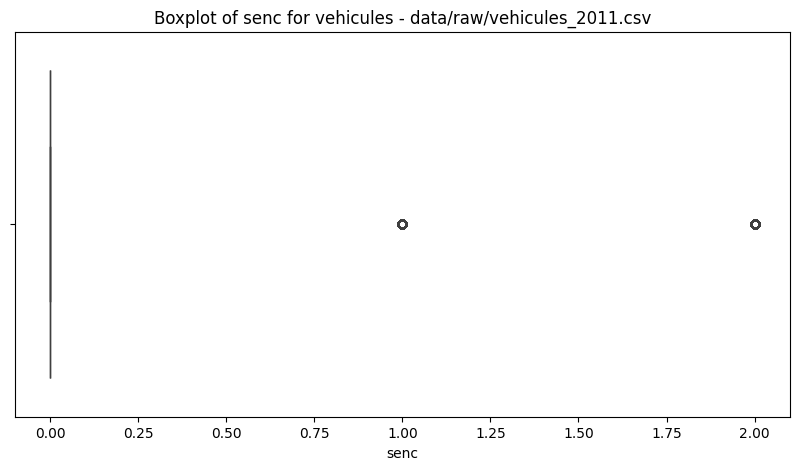

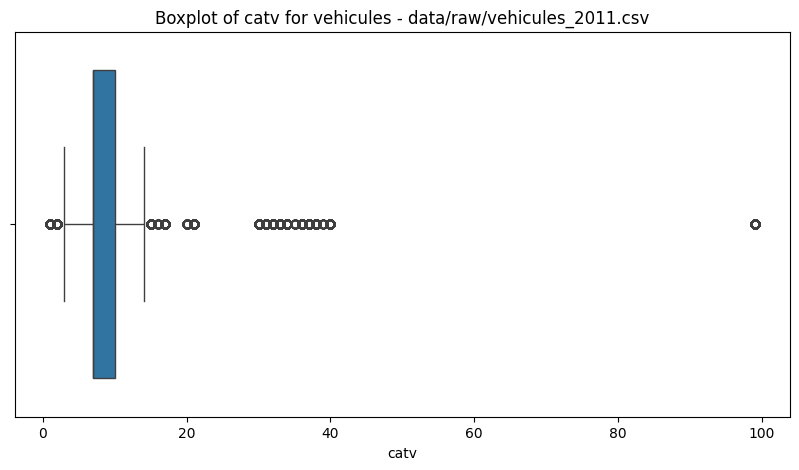

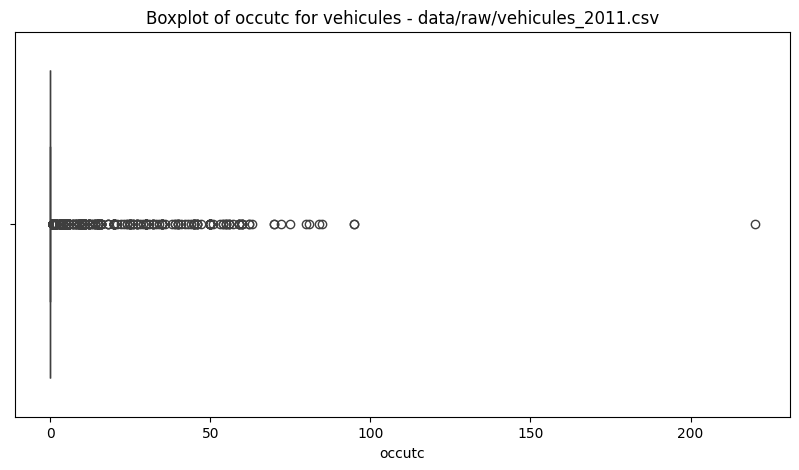

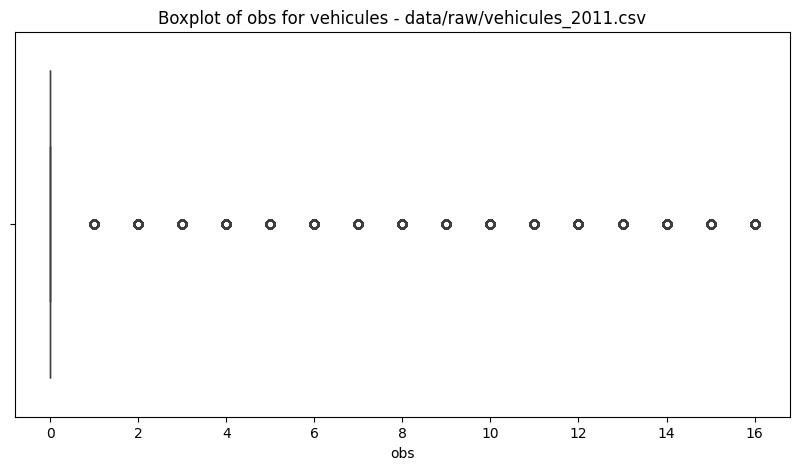

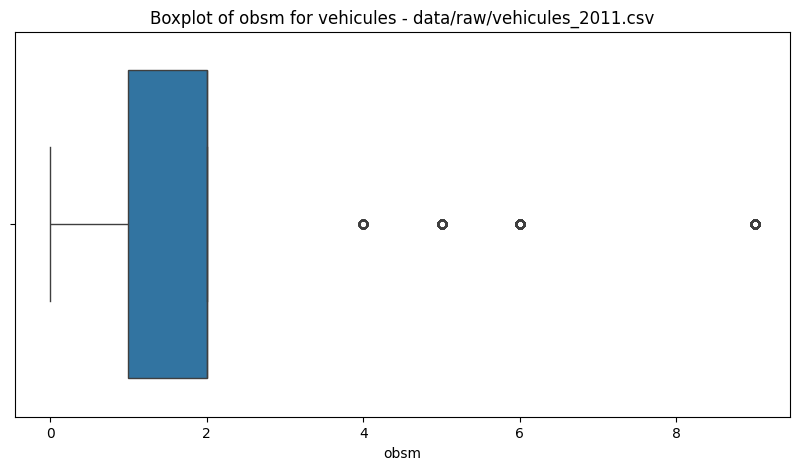

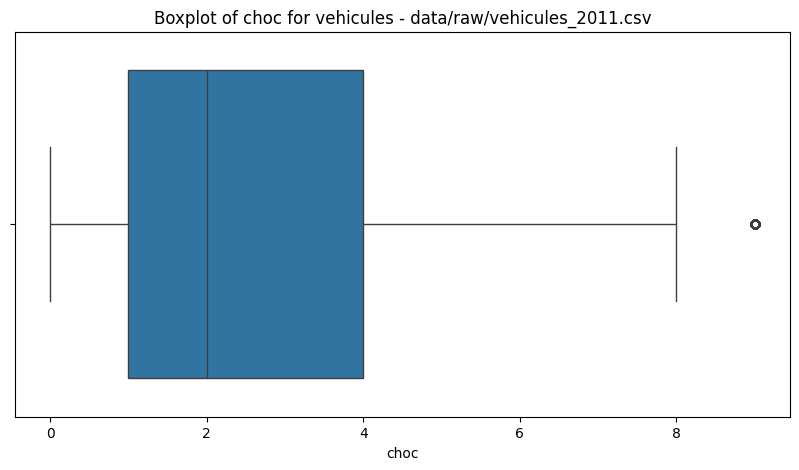

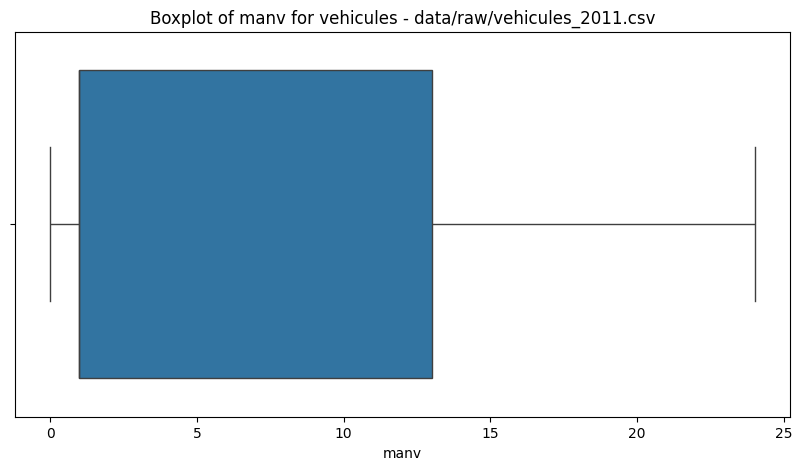

Categorical Analysis for vehicules - data/raw/vehicules_2012.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              59 |       105755 |             0 |
+----------+---------+-----------------+--------------+---------------+


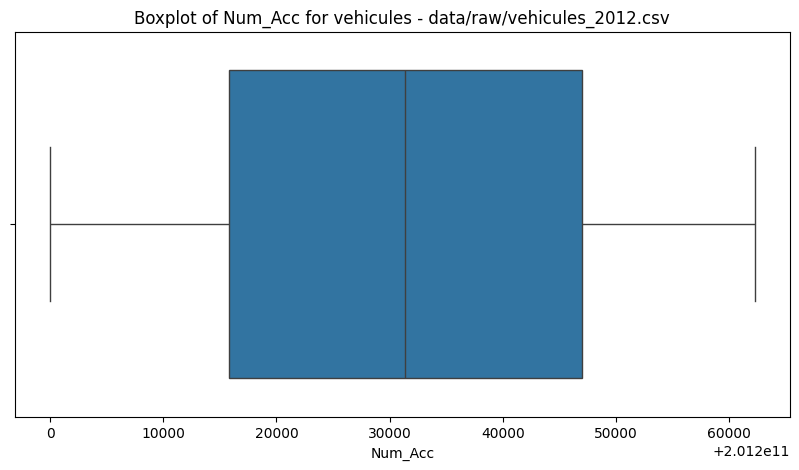

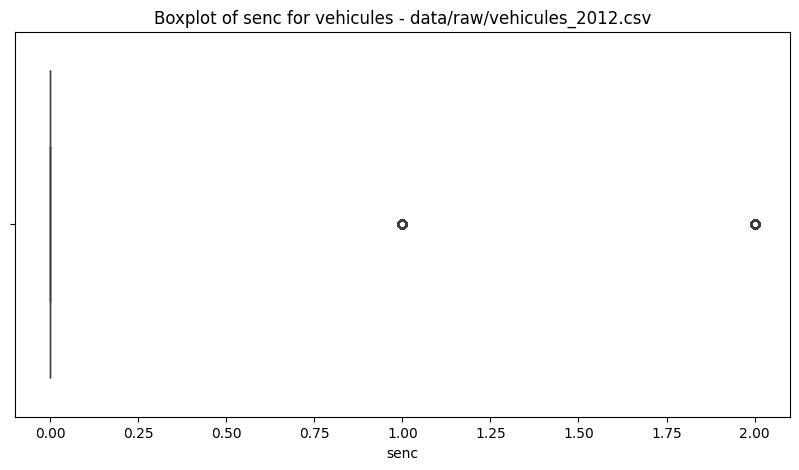

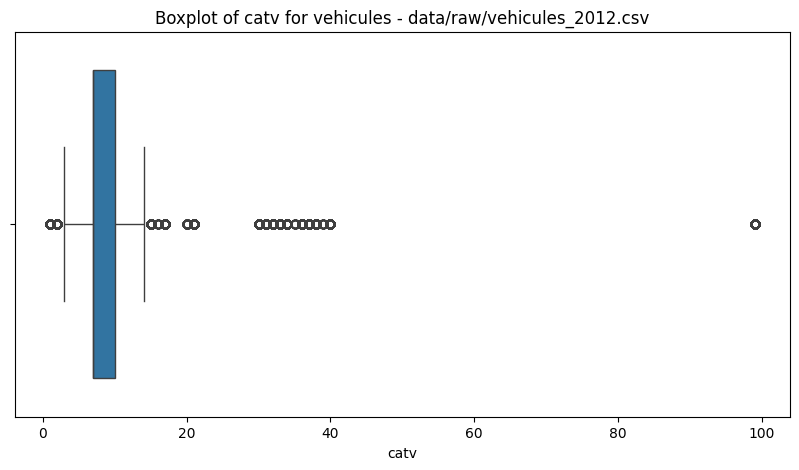

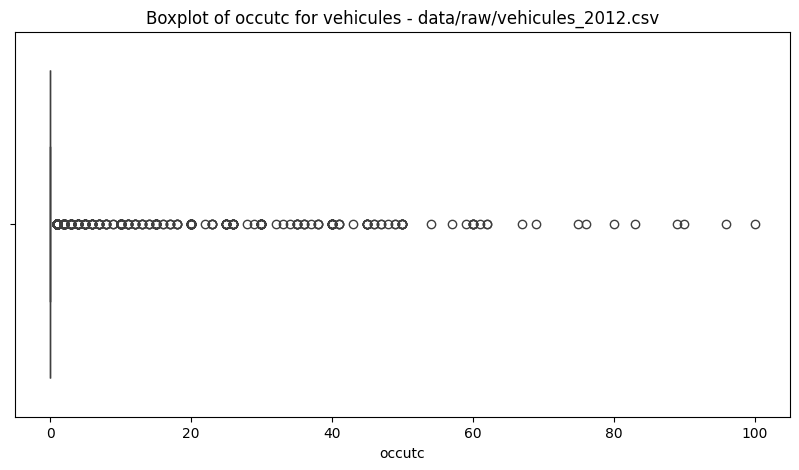

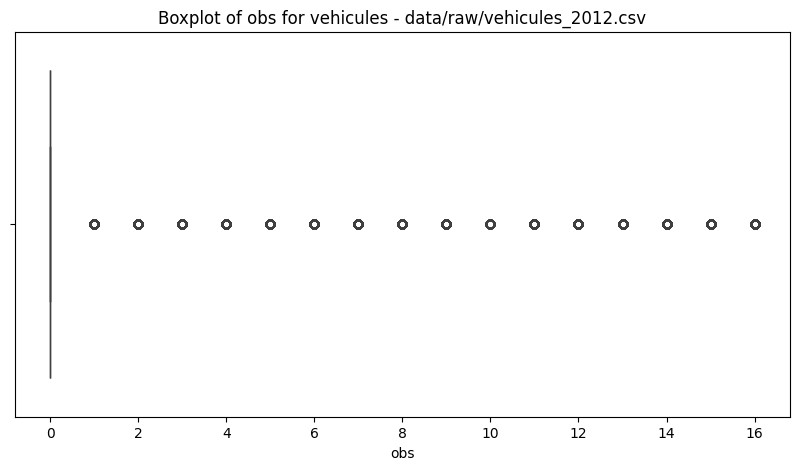

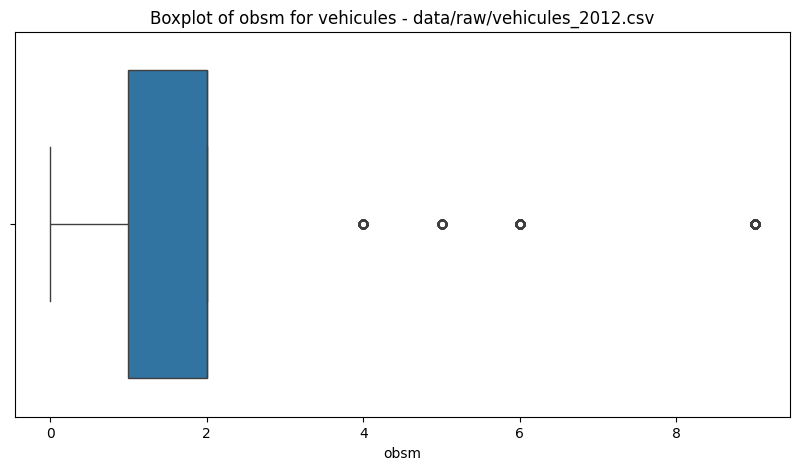

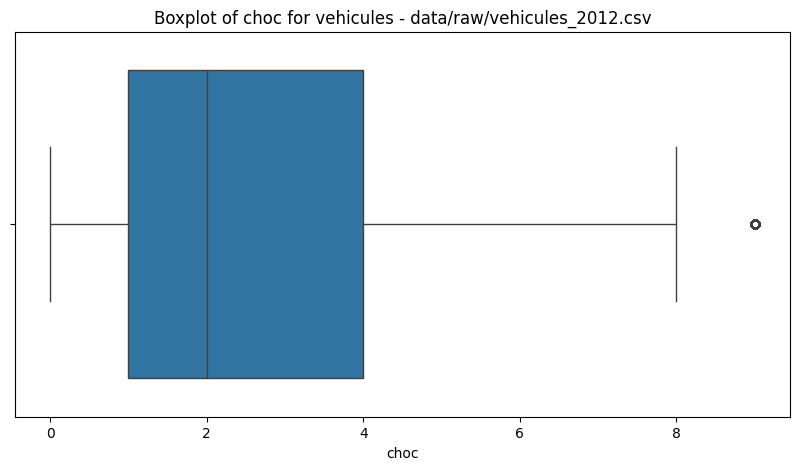

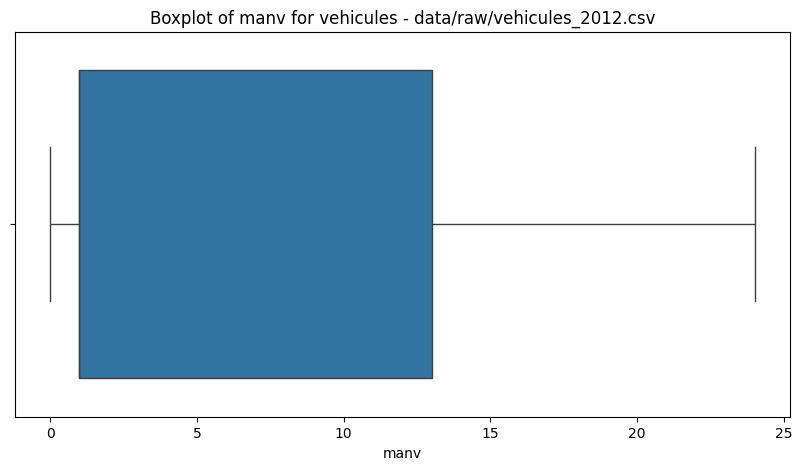

Categorical Analysis for vehicules - data/raw/vehicules_2013.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              60 |        98865 |             0 |
+----------+---------+-----------------+--------------+---------------+


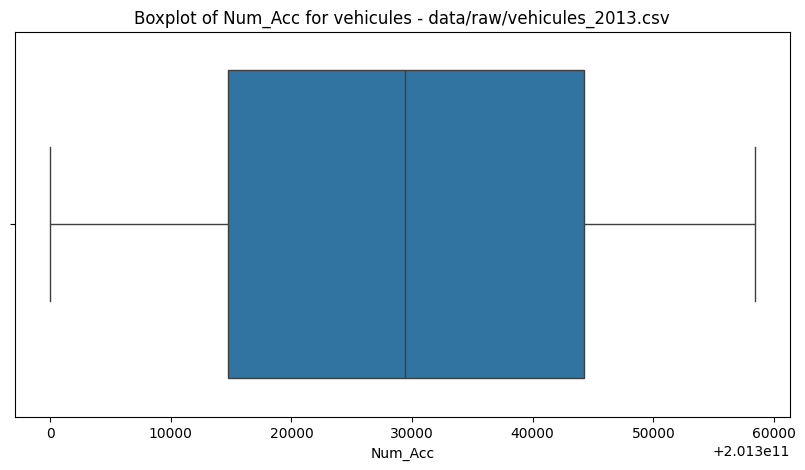

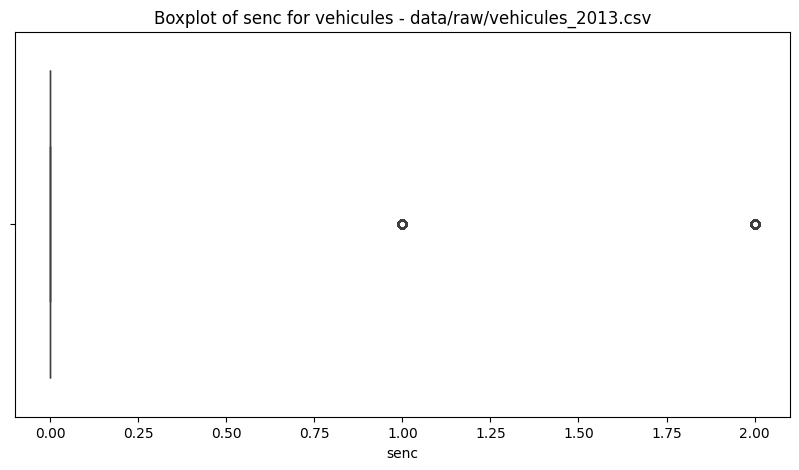

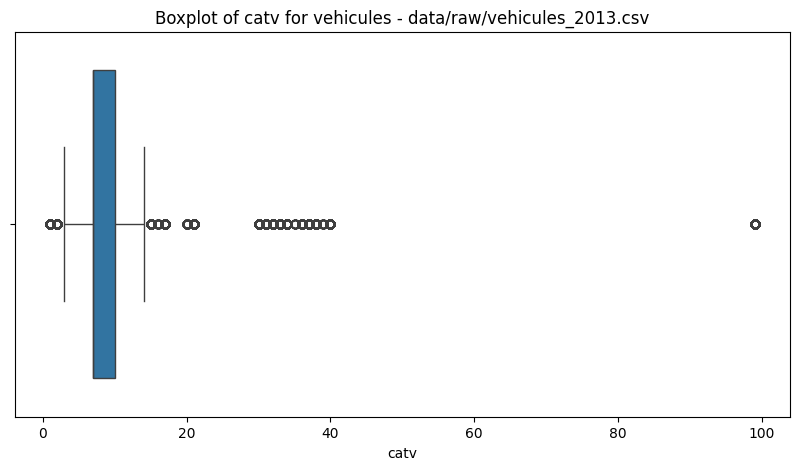

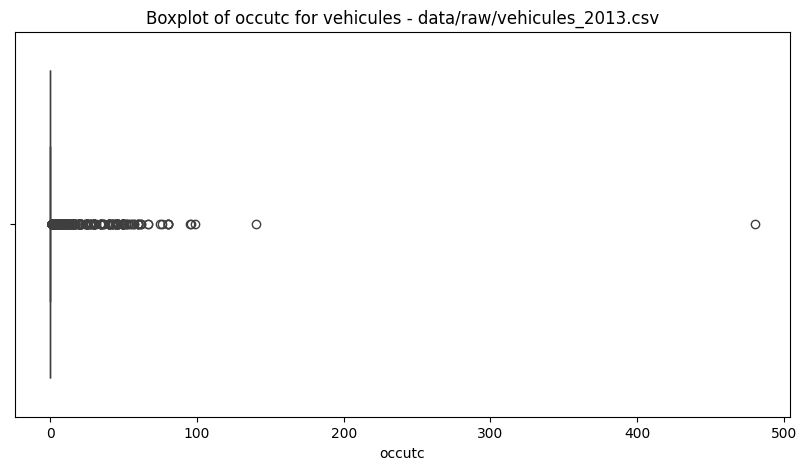

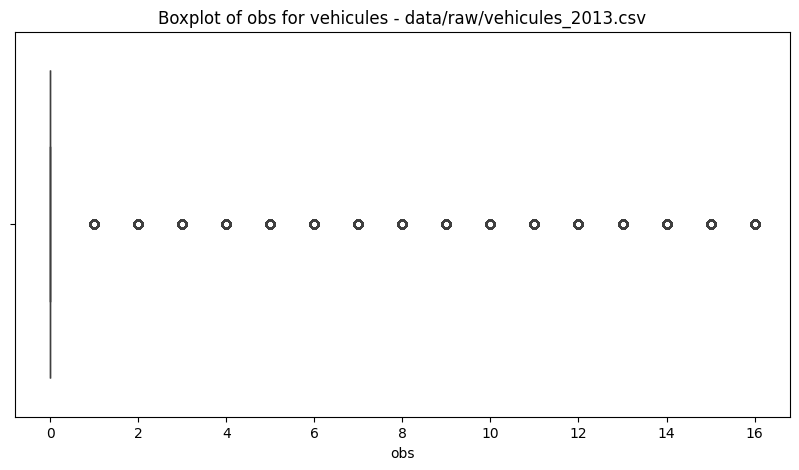

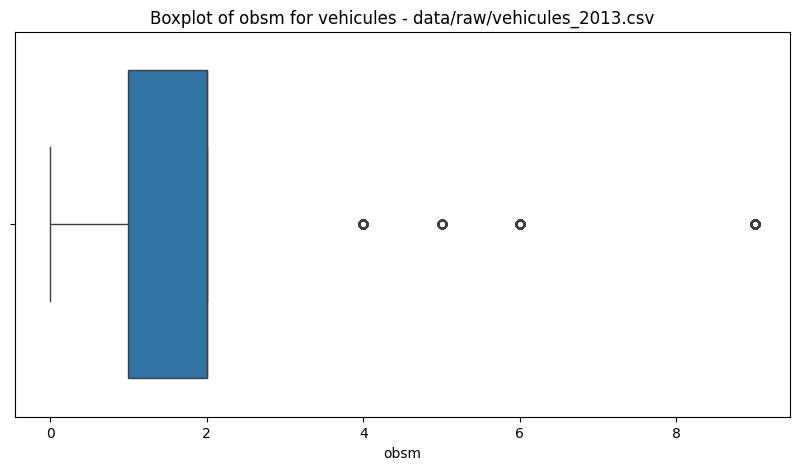

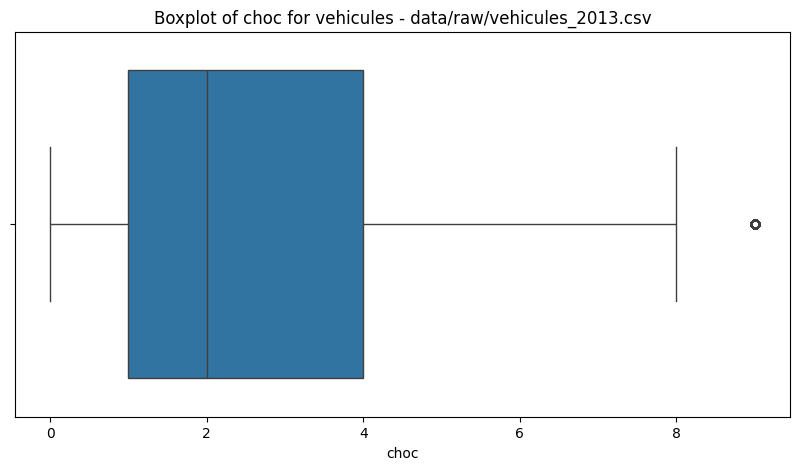

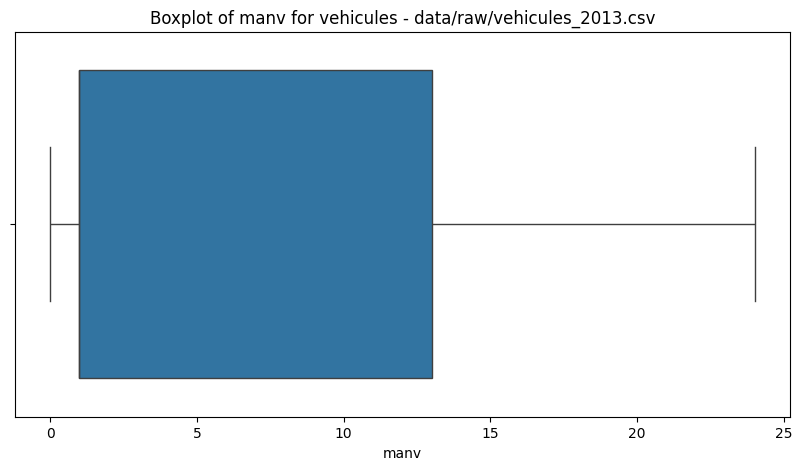

Categorical Analysis for vehicules - data/raw/vehicules_2014.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              42 |       101720 |             0 |
+----------+---------+-----------------+--------------+---------------+


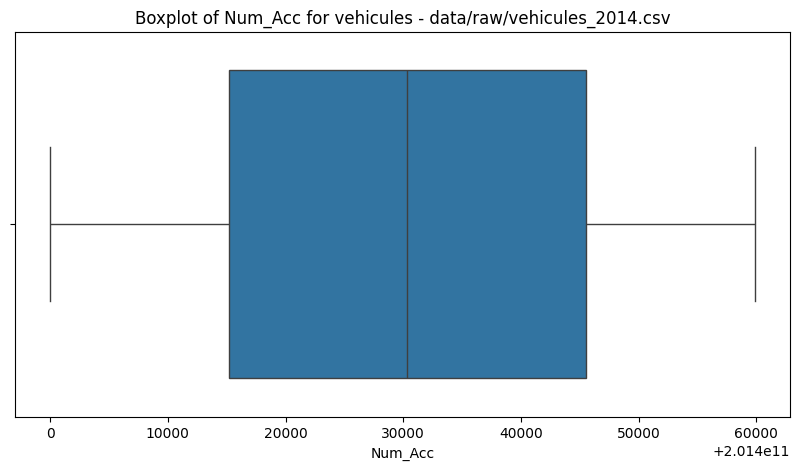

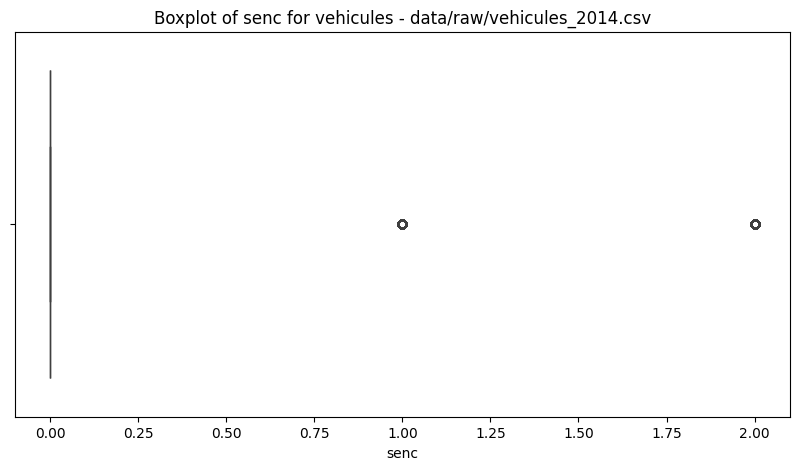

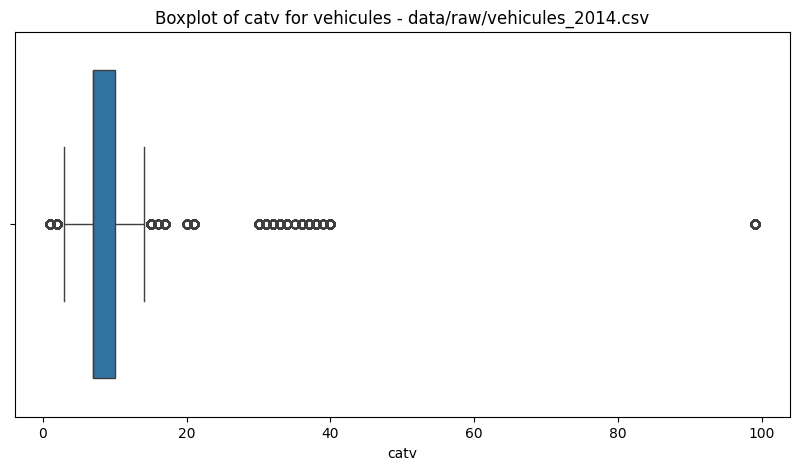

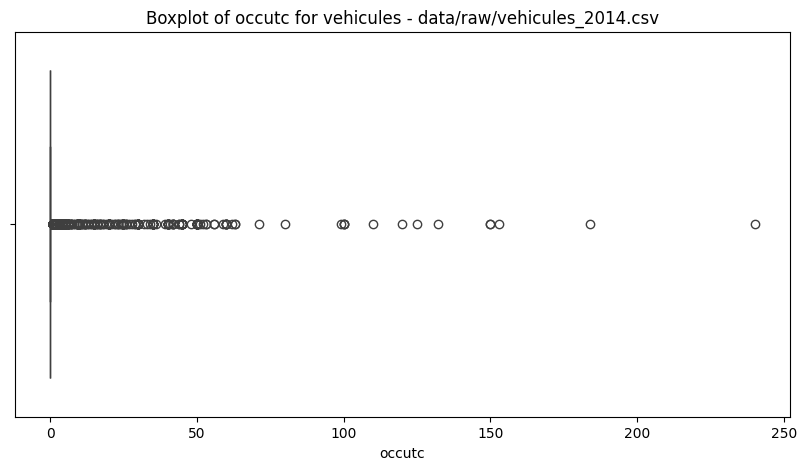

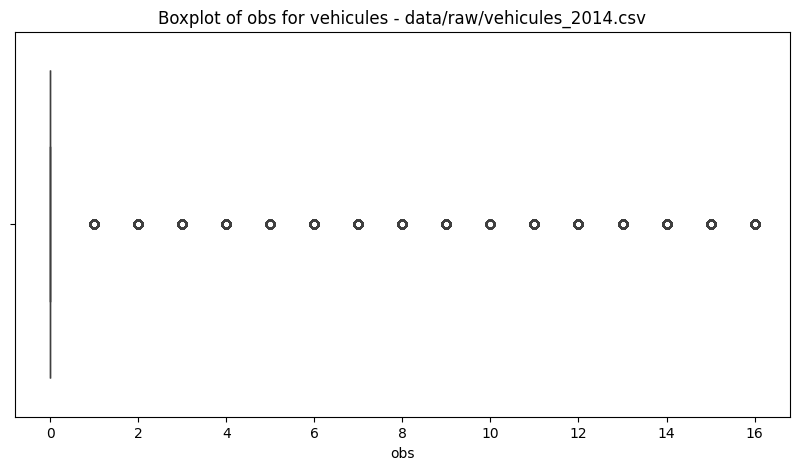

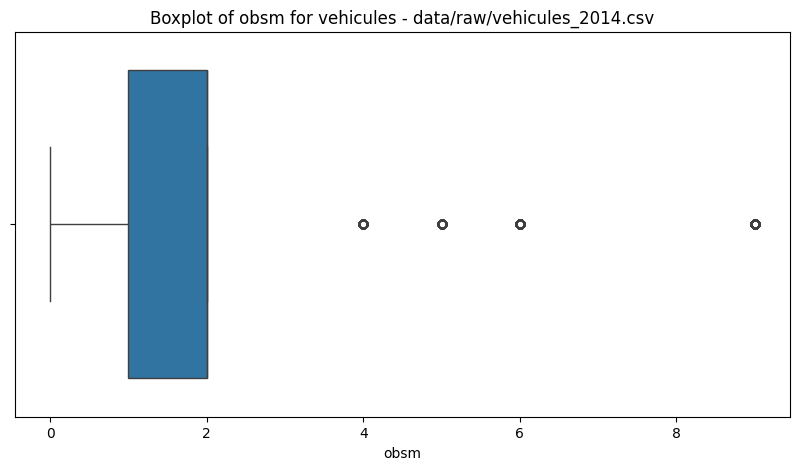

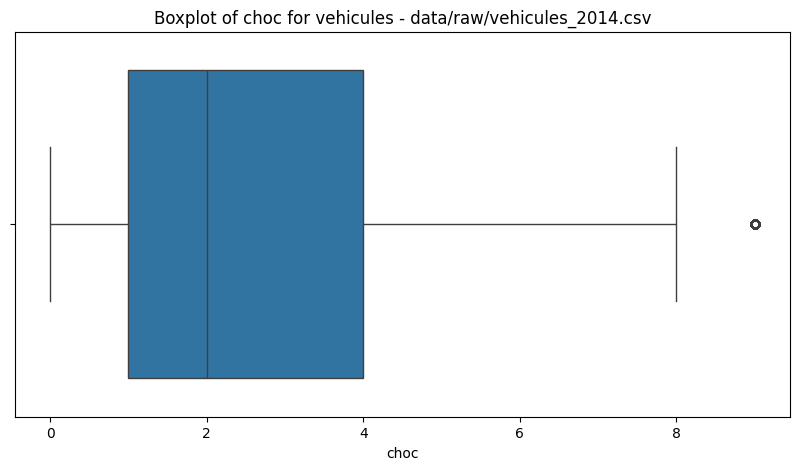

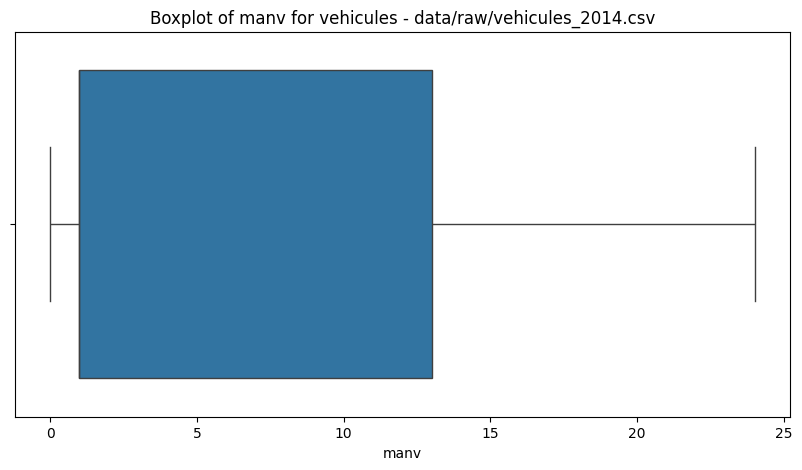

Categorical Analysis for vehicules - data/raw/vehicules_2015.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              58 |        99720 |             0 |
+----------+---------+-----------------+--------------+---------------+


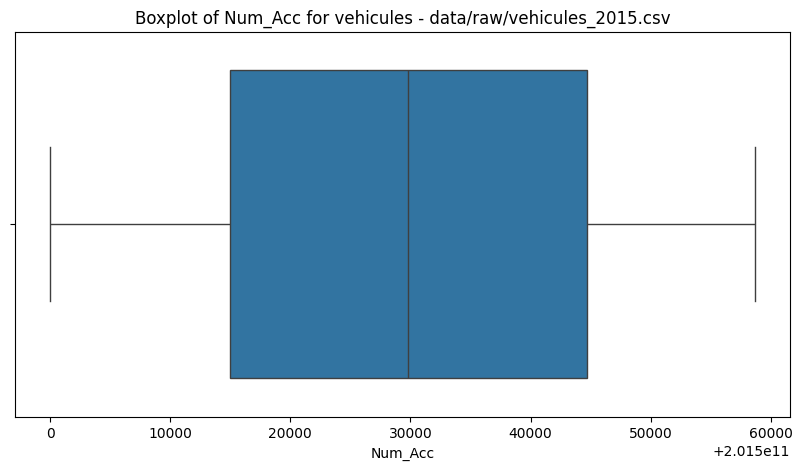

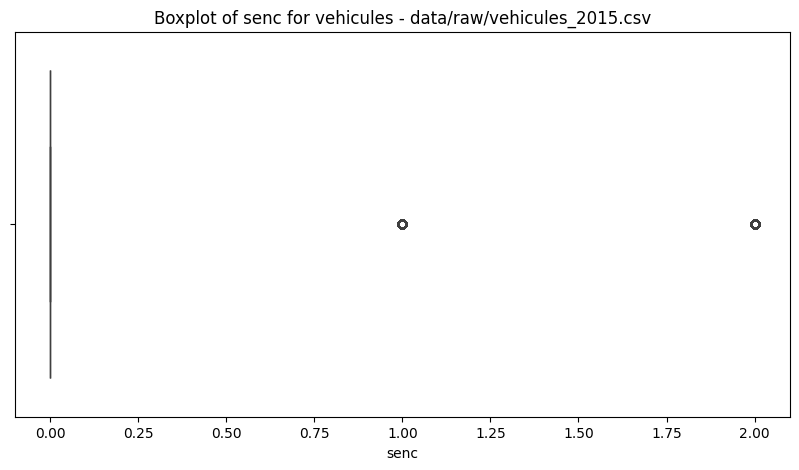

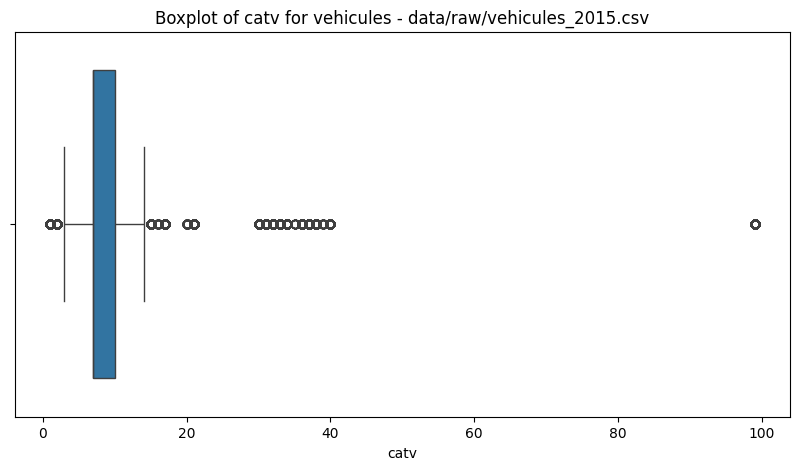

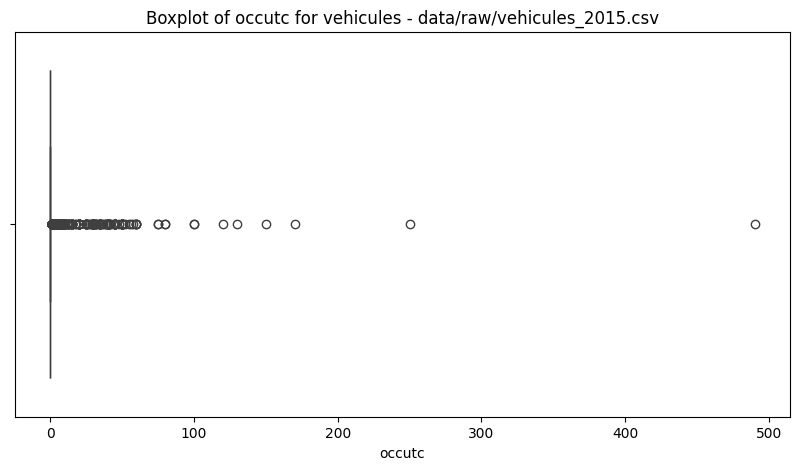

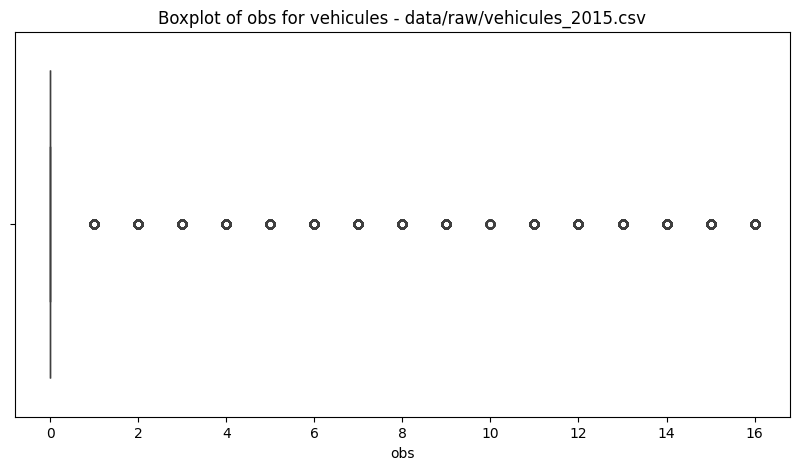

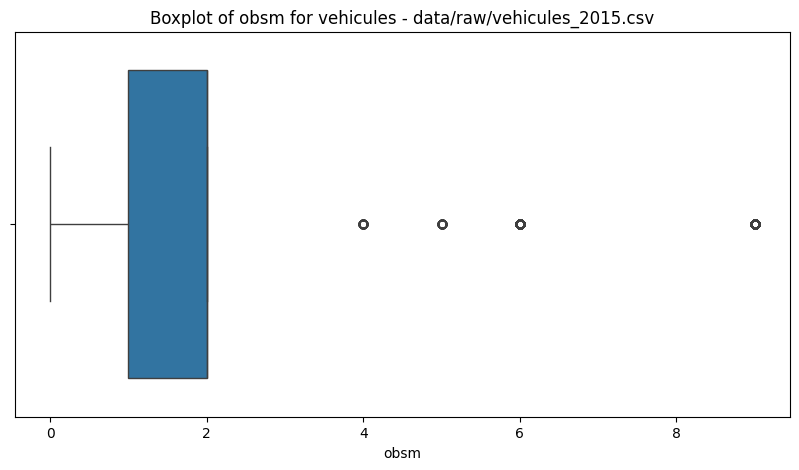

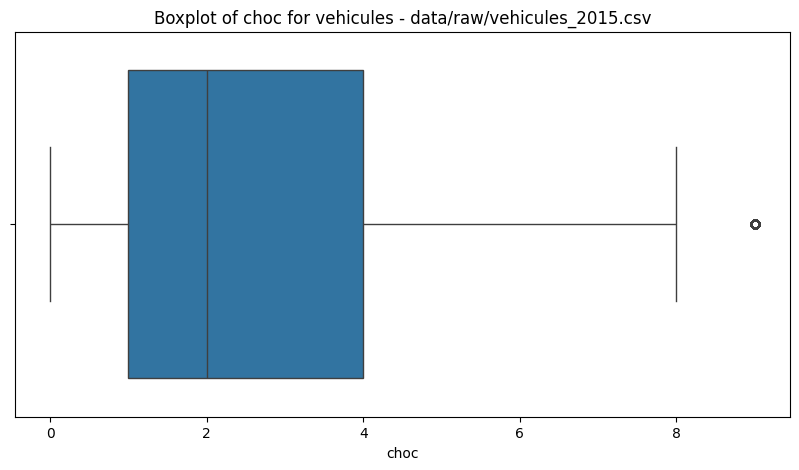

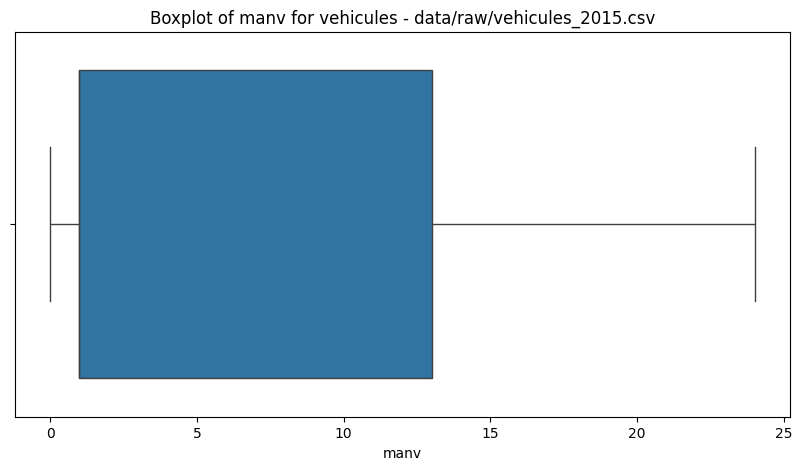

Categorical Analysis for vehicules - data/raw/vehicules_2016.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              77 |       101847 |             0 |
+----------+---------+-----------------+--------------+---------------+


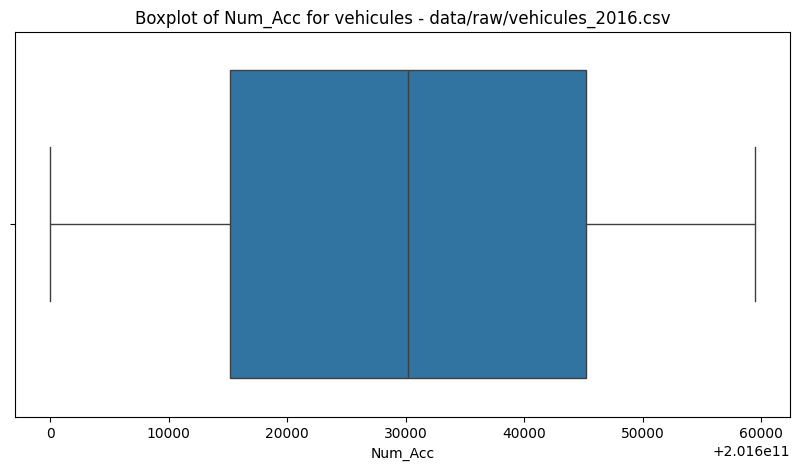

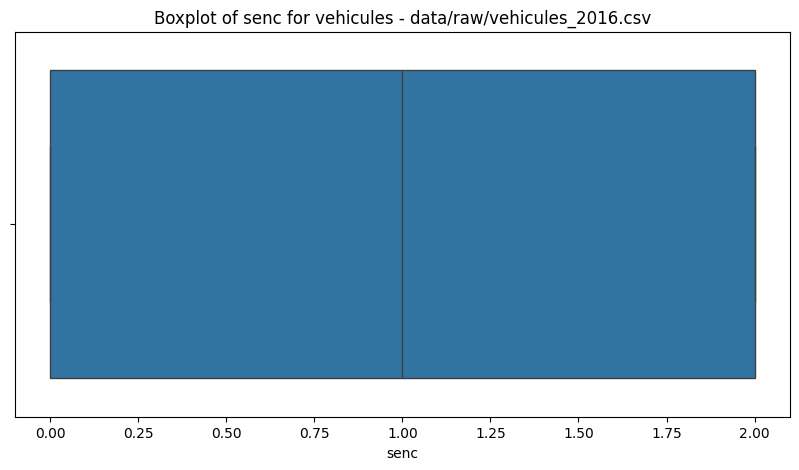

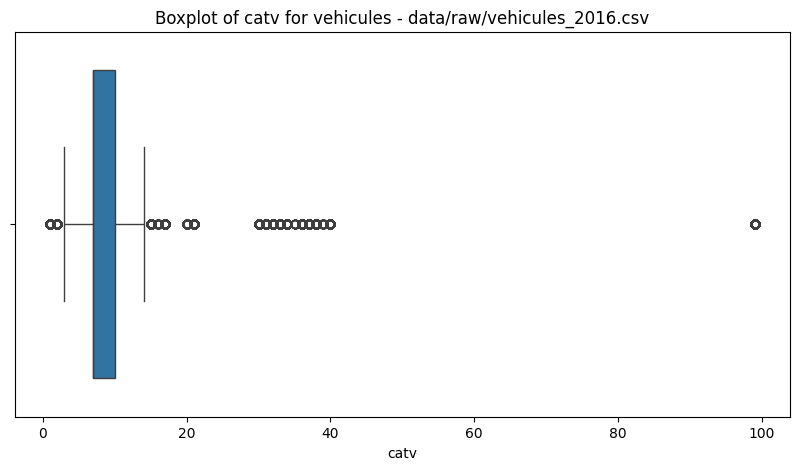

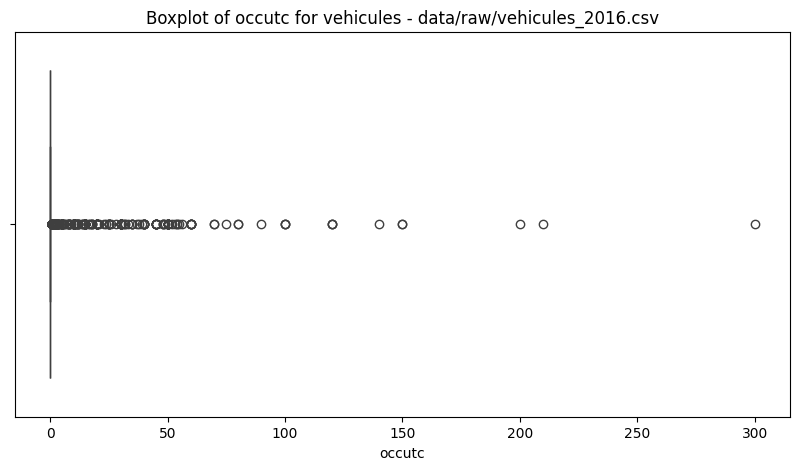

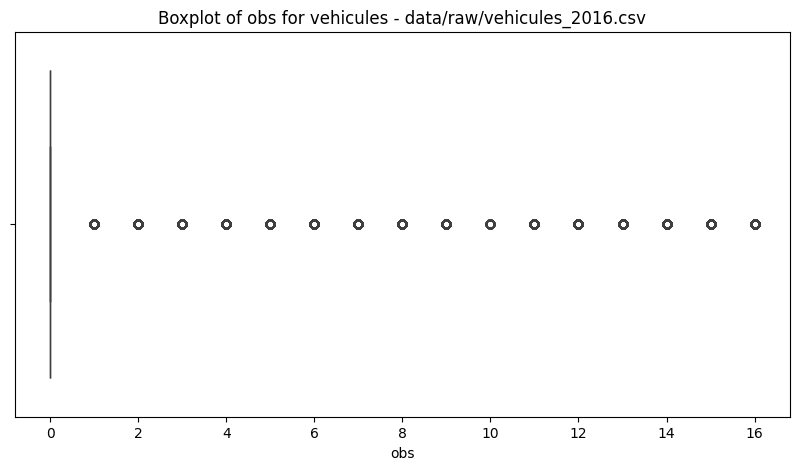

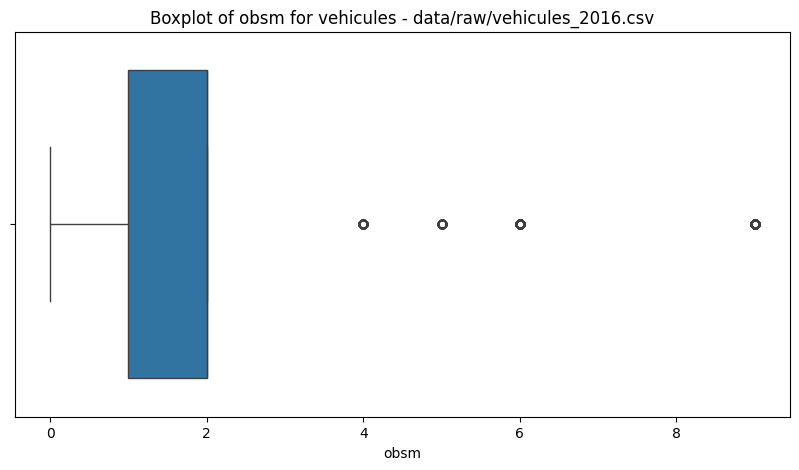

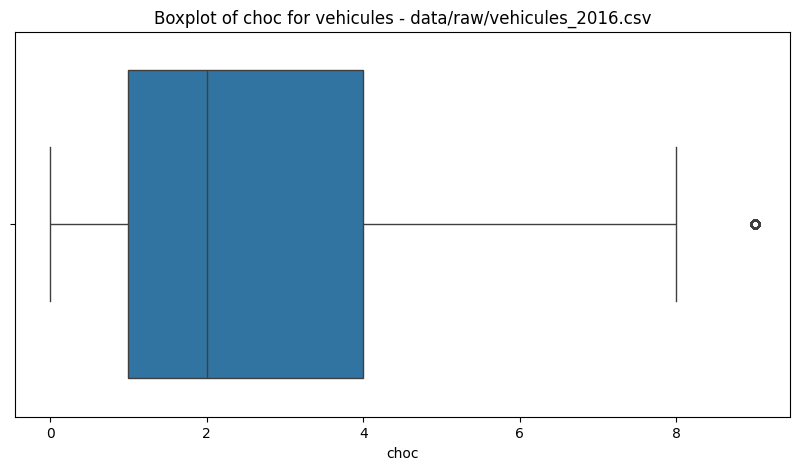

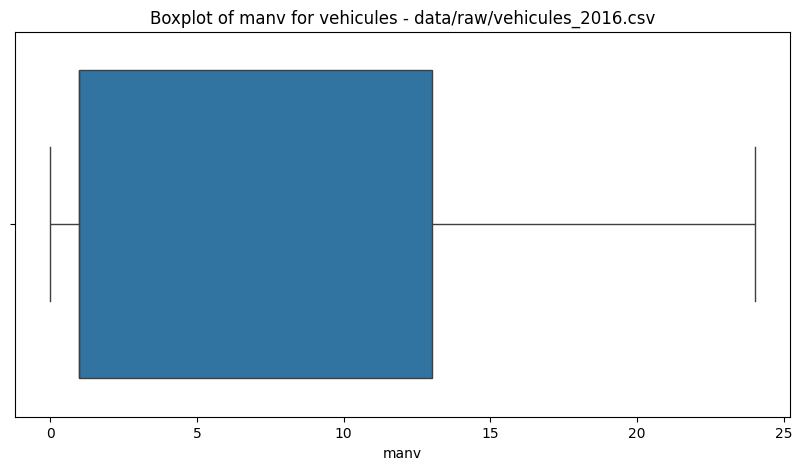

Categorical Analysis for vehicules - data/raw/vehicules-2017.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              43 |       103503 |             0 |
+----------+---------+-----------------+--------------+---------------+


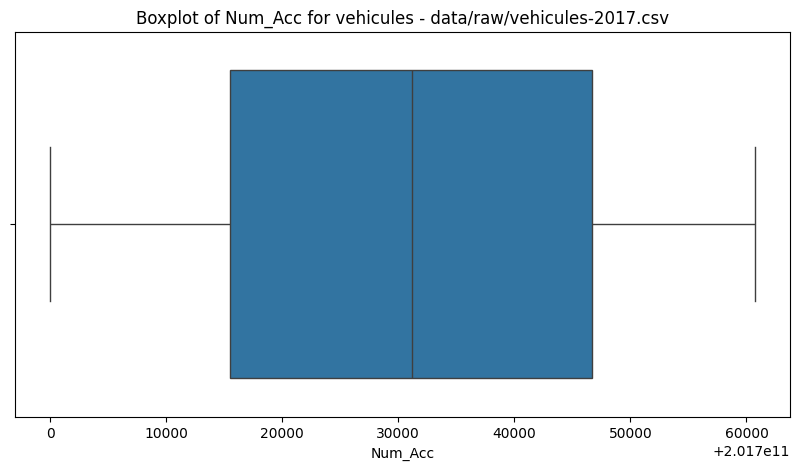

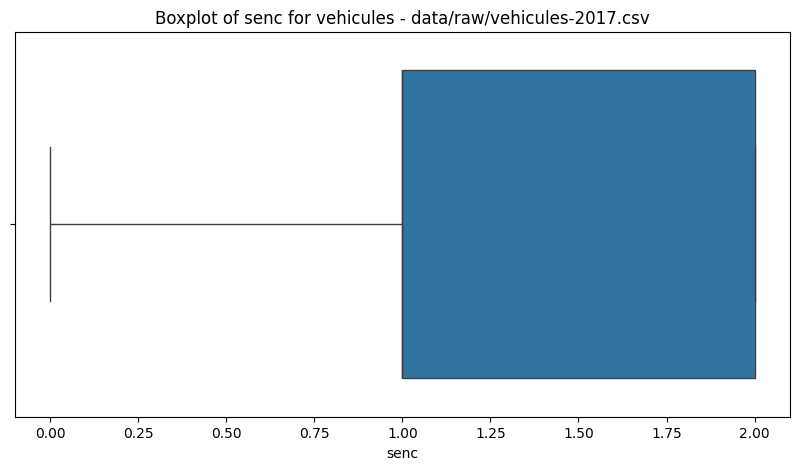

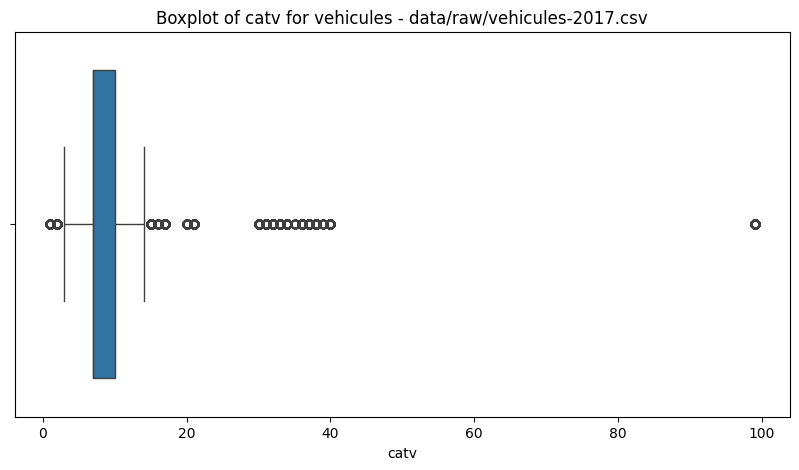

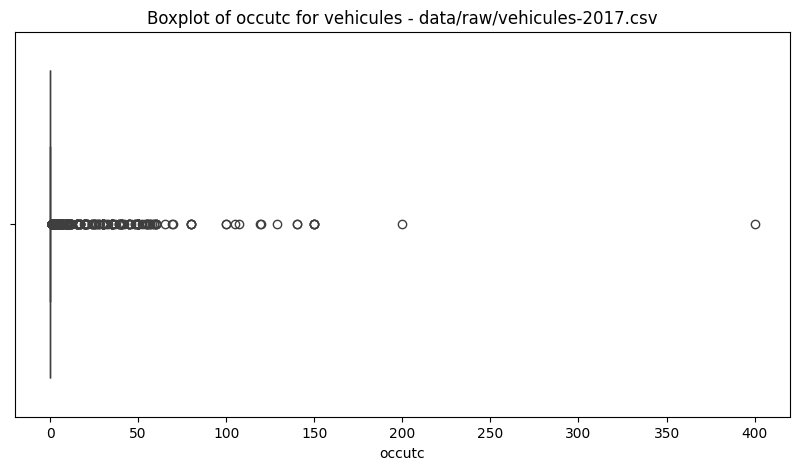

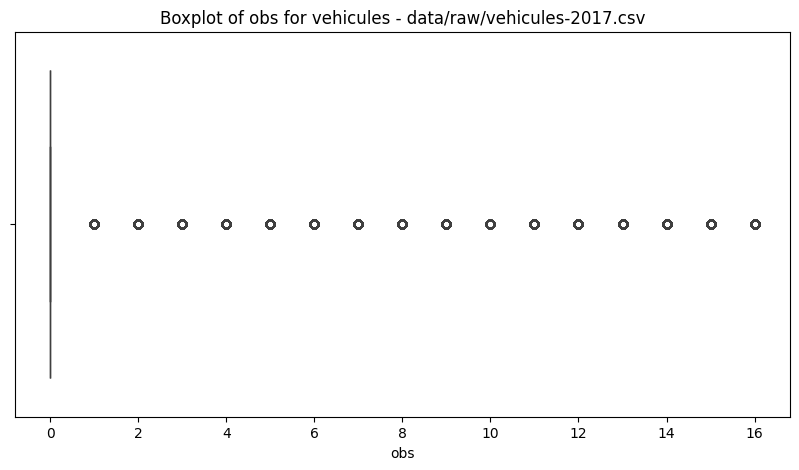

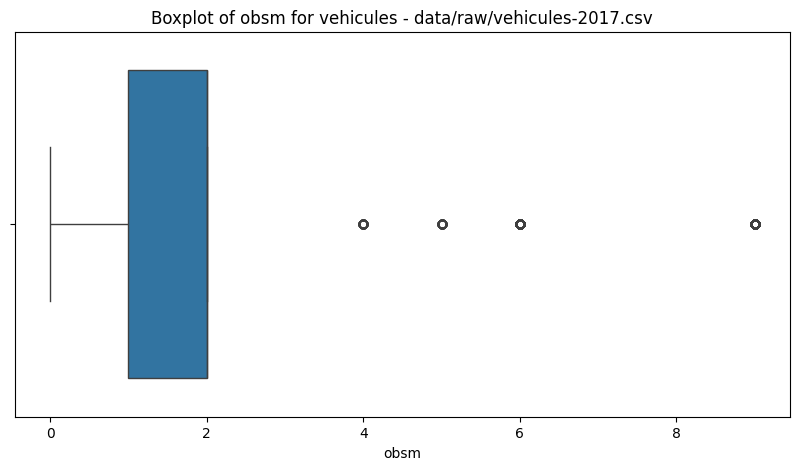

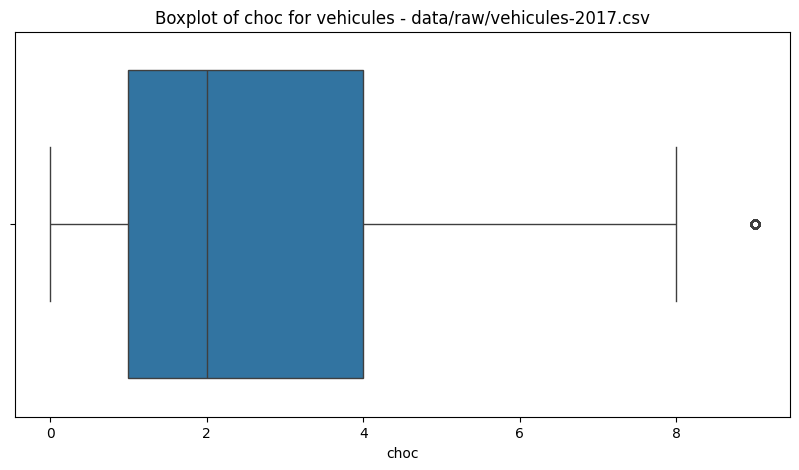

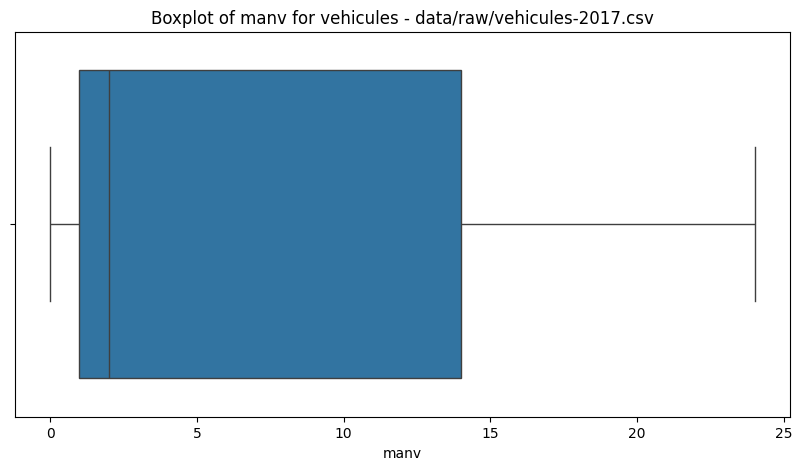

Categorical Analysis for vehicules - data/raw/vehicules-2018.csv
+----------+---------+-----------------+--------------+---------------+
| Column   | Dtype   |   Unique Values |   Duplicates |   Null Values |
+==========+=========+=================+==============+===============+
| num_veh  | object  |              26 |        98850 |             0 |
+----------+---------+-----------------+--------------+---------------+


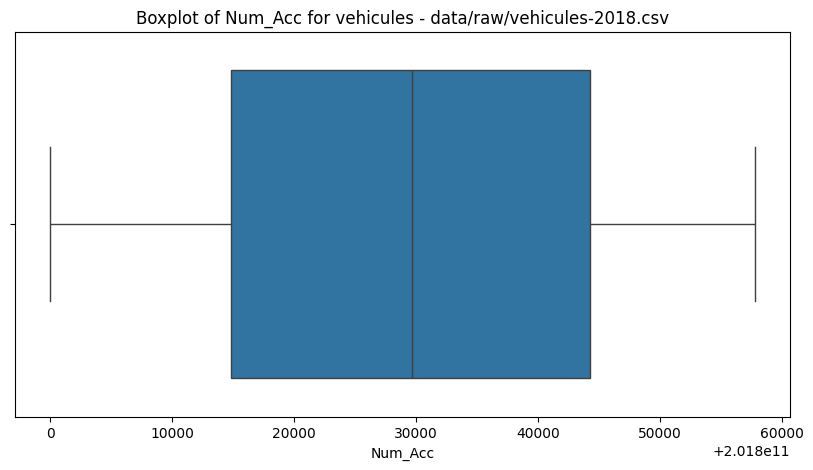

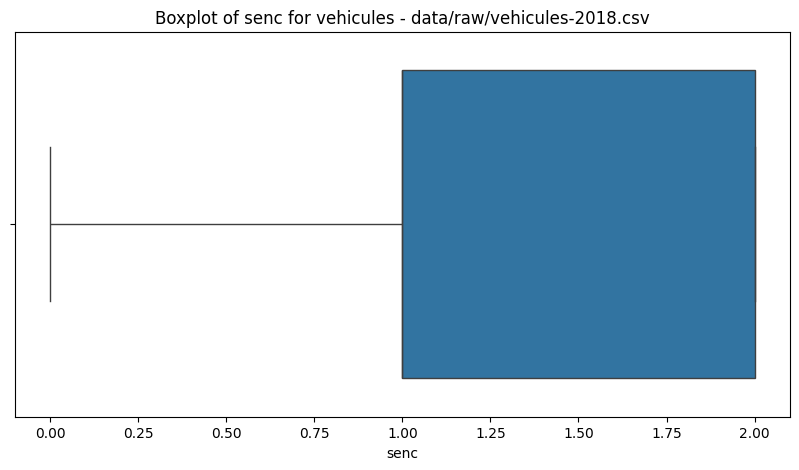

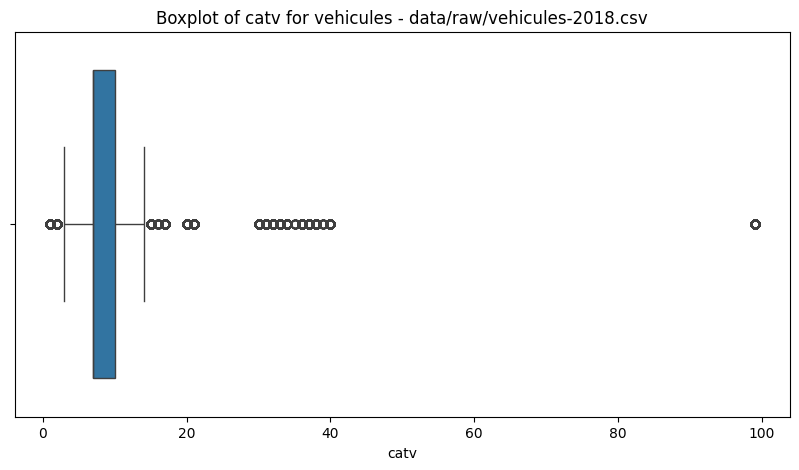

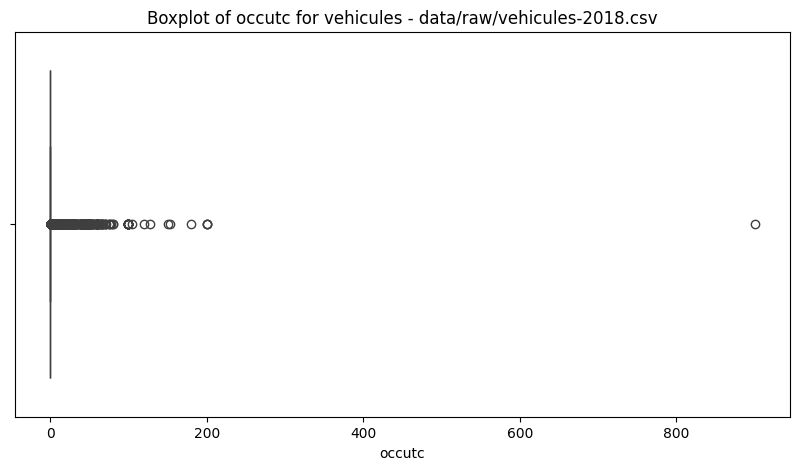

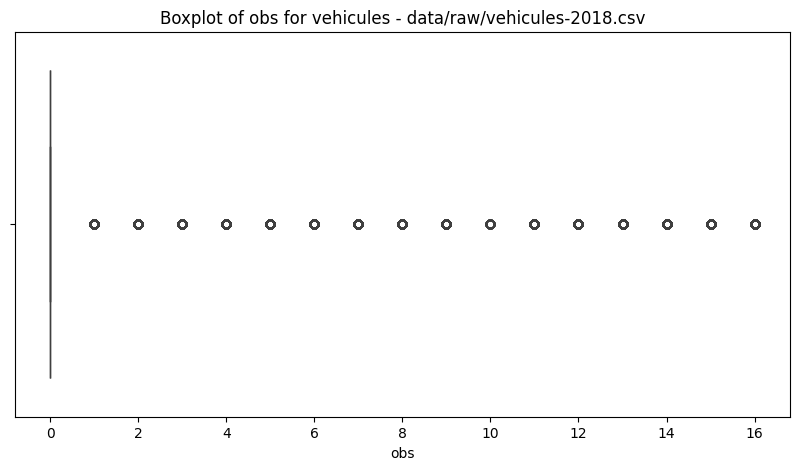

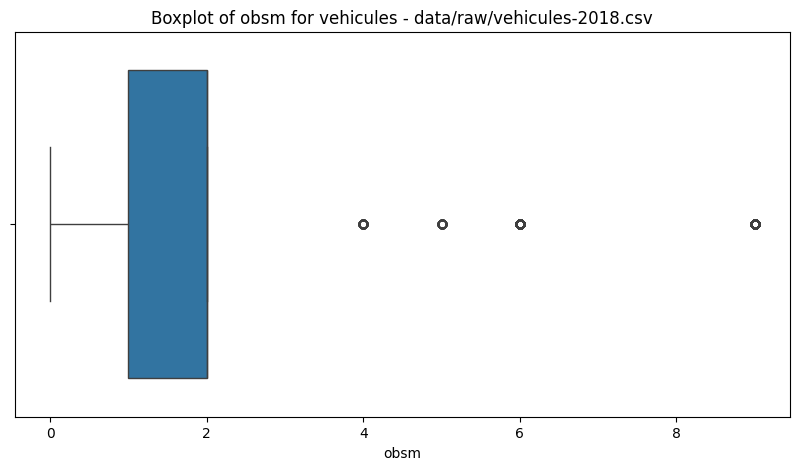

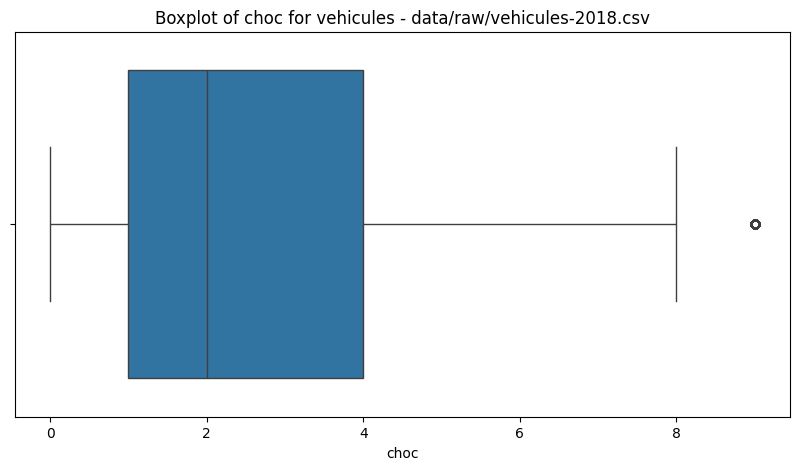

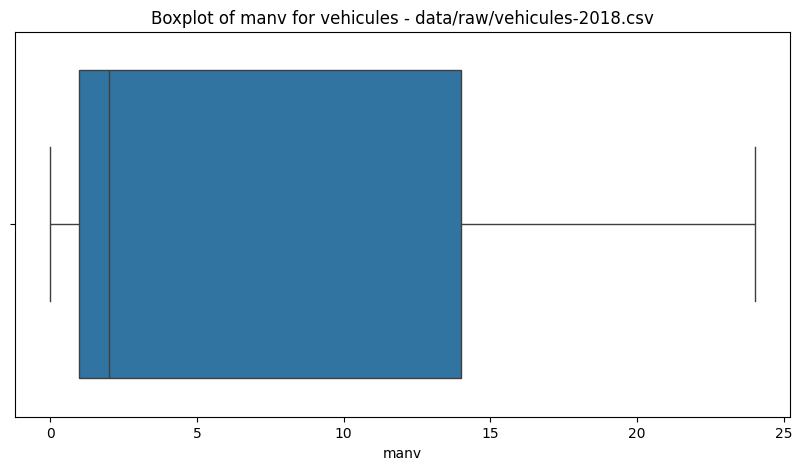

Categorical Analysis for vehicules - data/raw/vehicules-2019.csv
+-------------+---------+-----------------+--------------+---------------+
| Column      | Dtype   |   Unique Values |   Duplicates |   Null Values |
+=============+=========+=================+==============+===============+
| id_vehicule | object  |          100710 |            0 |             0 |
+-------------+---------+-----------------+--------------+---------------+
| num_veh     | object  |              48 |       100662 |             0 |
+-------------+---------+-----------------+--------------+---------------+


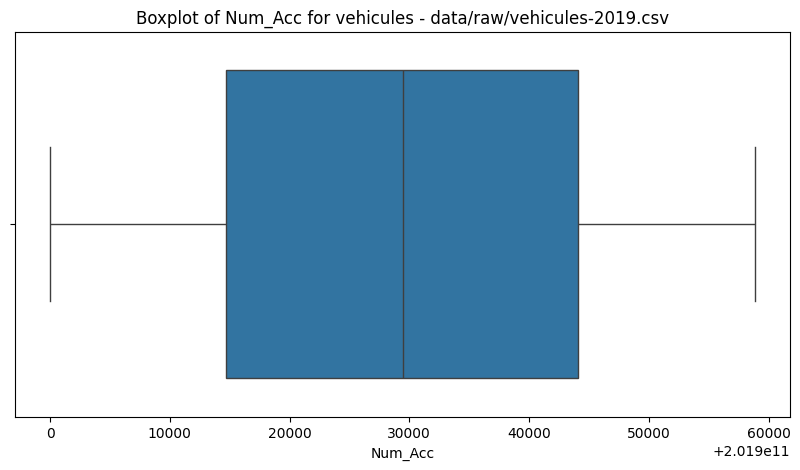

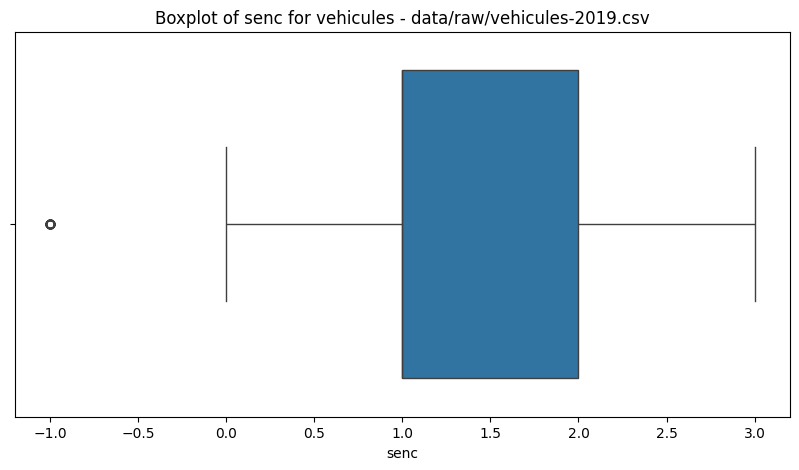

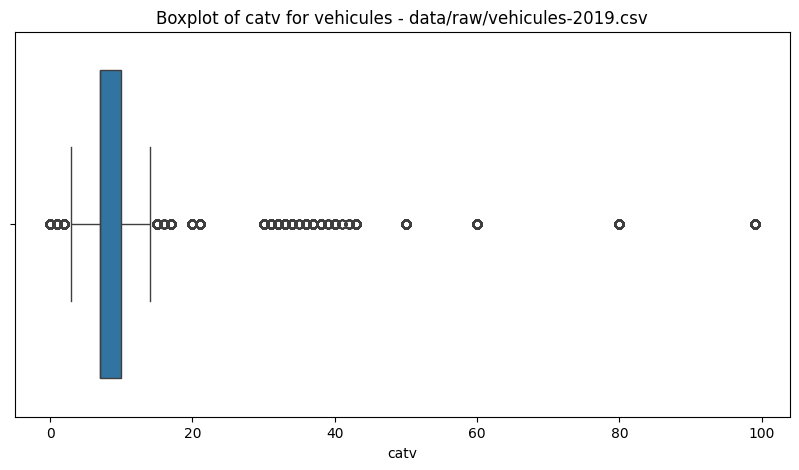

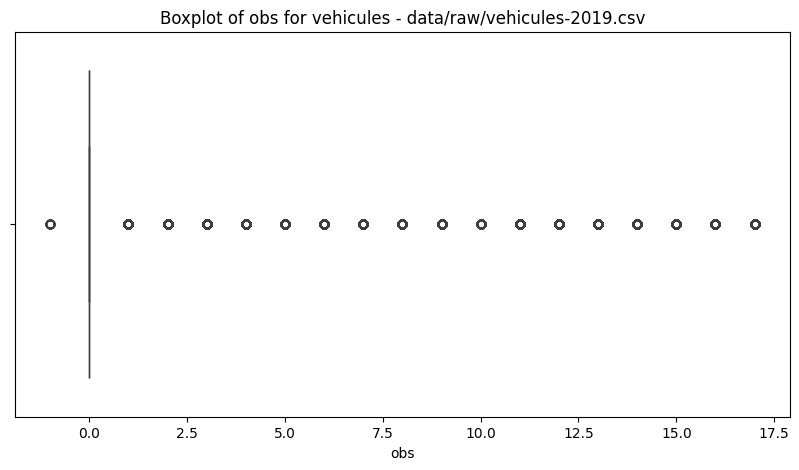

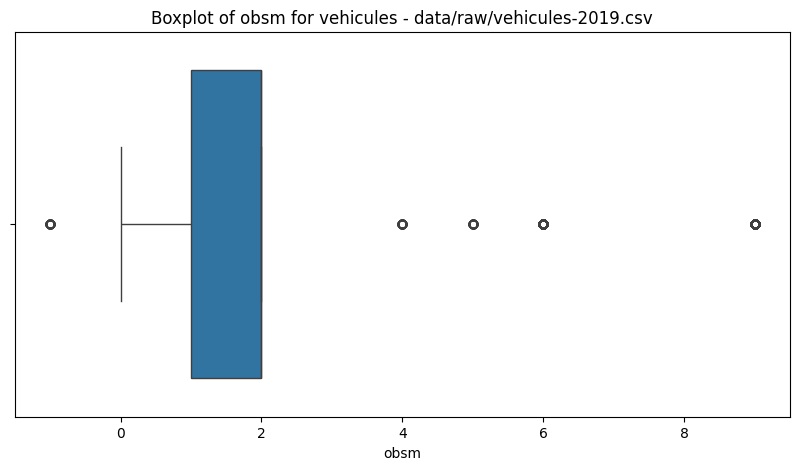

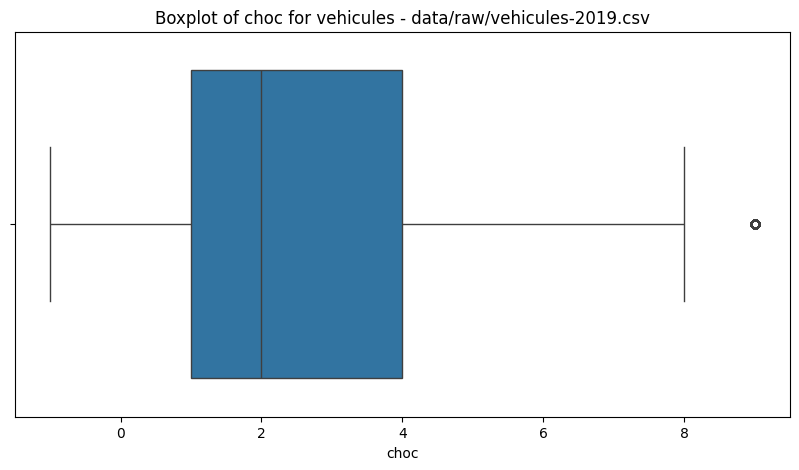

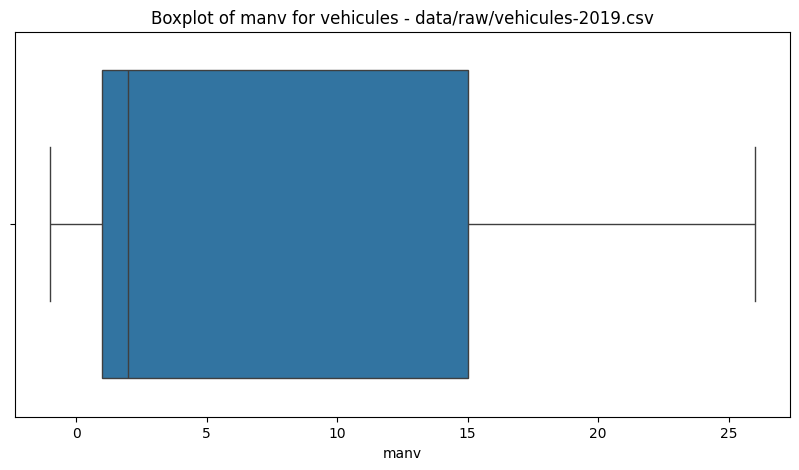

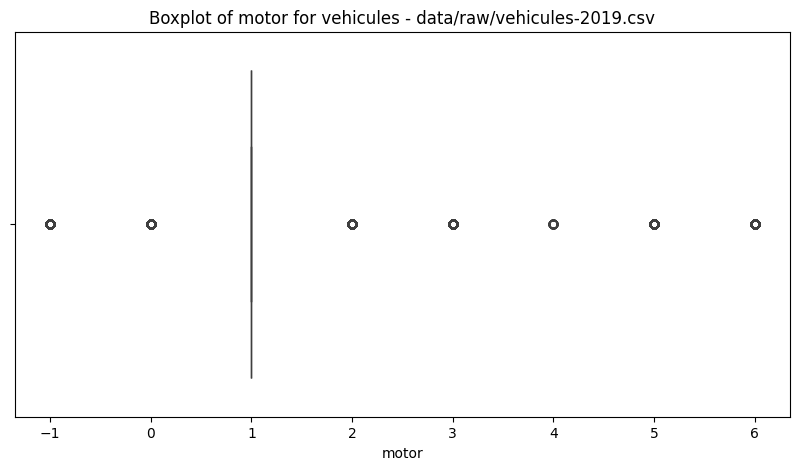

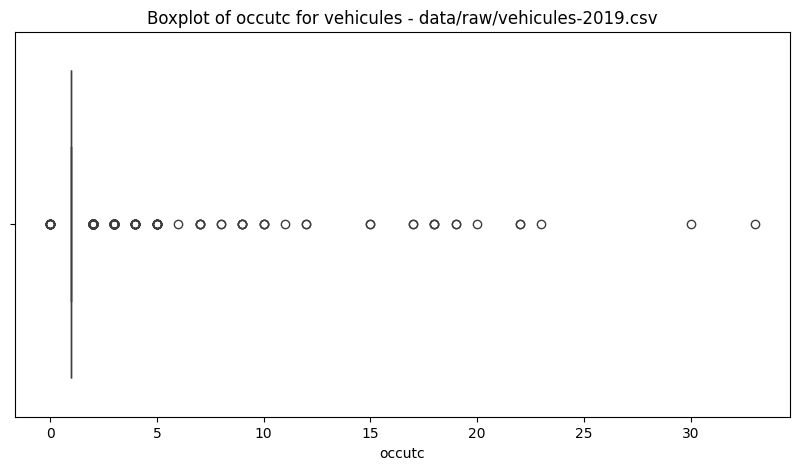

Categorical Analysis for vehicules - data/raw/vehicules-2020.csv
+-------------+---------+-----------------+--------------+---------------+
| Column      | Dtype   |   Unique Values |   Duplicates |   Null Values |
+=============+=========+=================+==============+===============+
| id_vehicule | object  |           81066 |            0 |             0 |
+-------------+---------+-----------------+--------------+---------------+
| num_veh     | object  |              51 |        81015 |             0 |
+-------------+---------+-----------------+--------------+---------------+


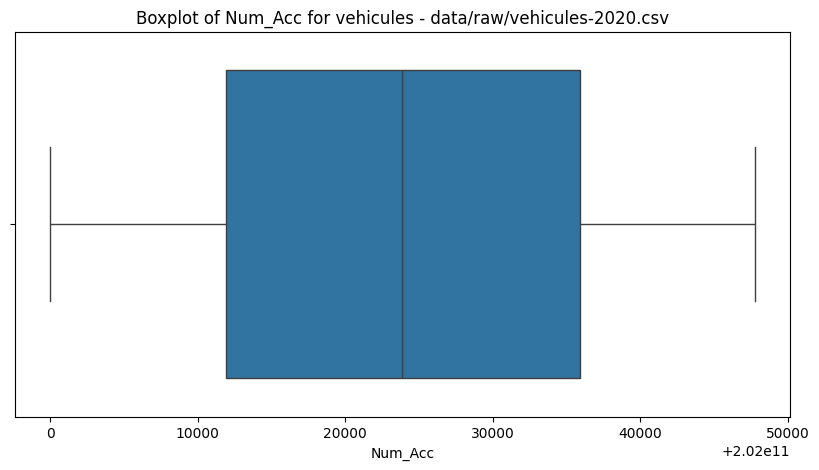

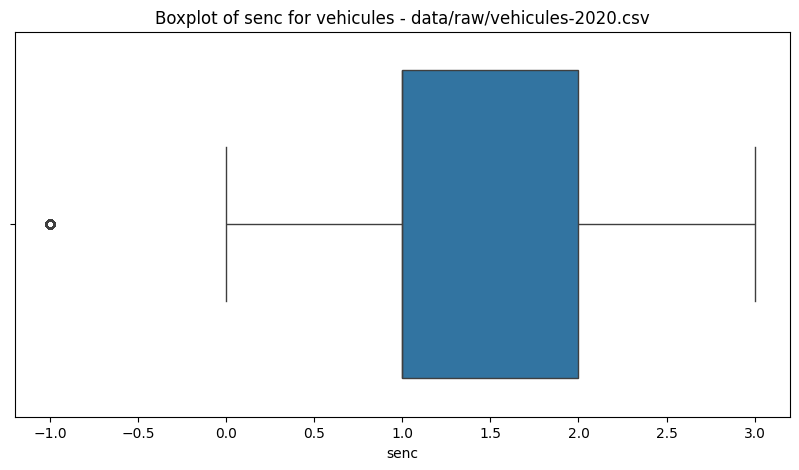

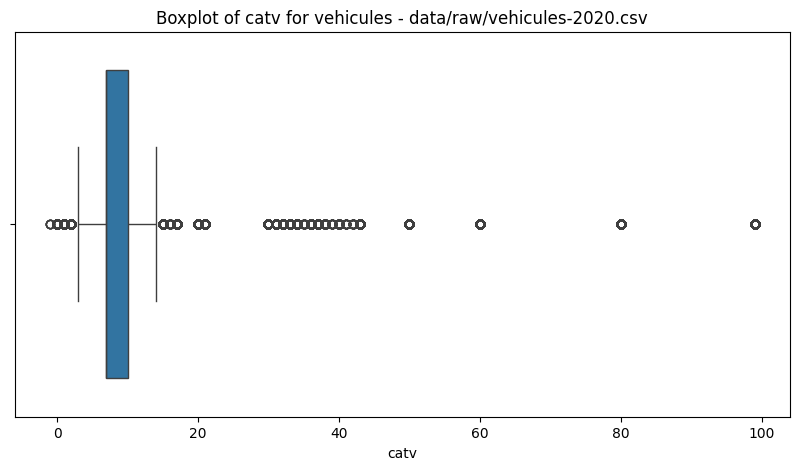

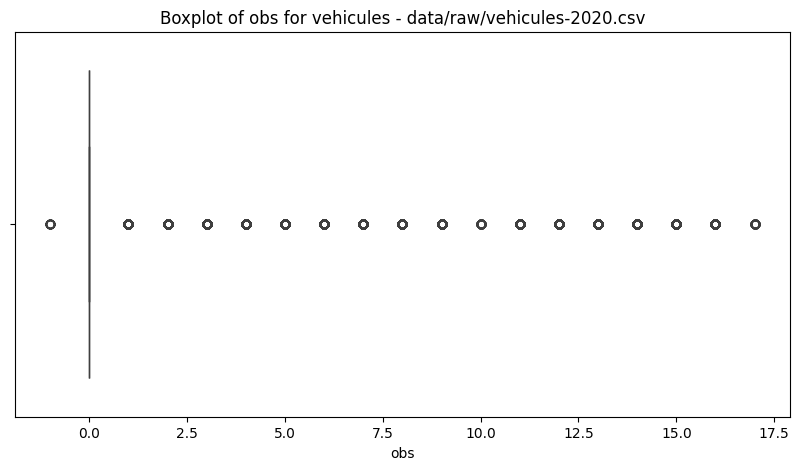

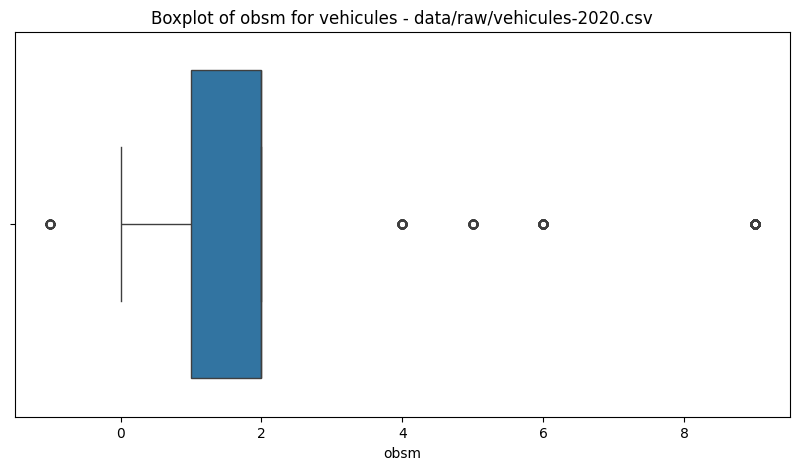

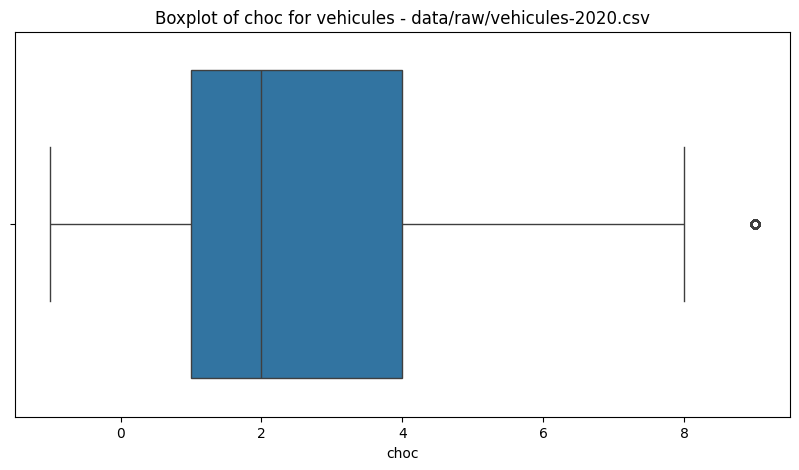

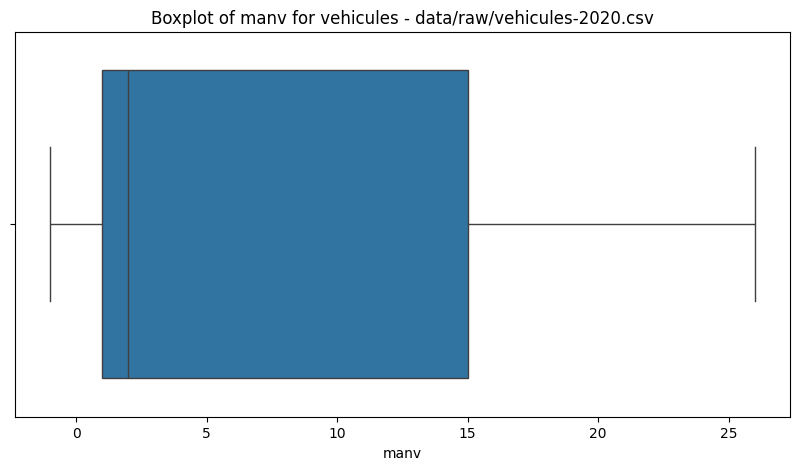

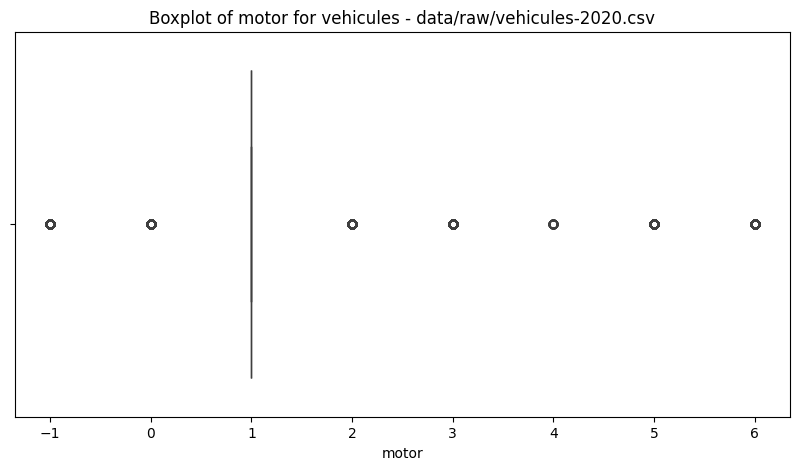

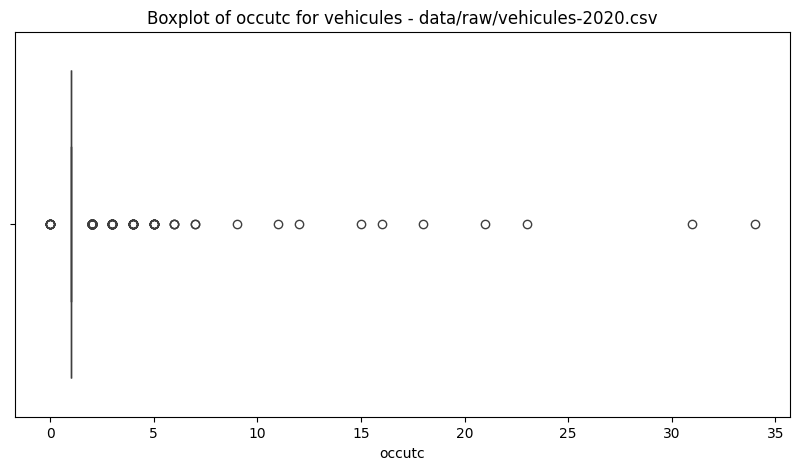

Categorical Analysis for vehicules - data/raw/vehicules-2021.csv
+-------------+---------+-----------------+--------------+---------------+
| Column      | Dtype   |   Unique Values |   Duplicates |   Null Values |
+=============+=========+=================+==============+===============+
| id_vehicule | object  |           97315 |            0 |             0 |
+-------------+---------+-----------------+--------------+---------------+
| num_veh     | object  |              53 |        97262 |             0 |
+-------------+---------+-----------------+--------------+---------------+


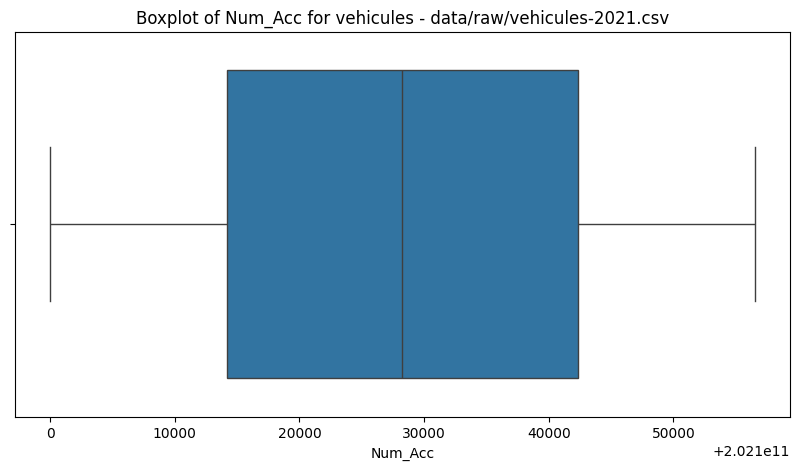

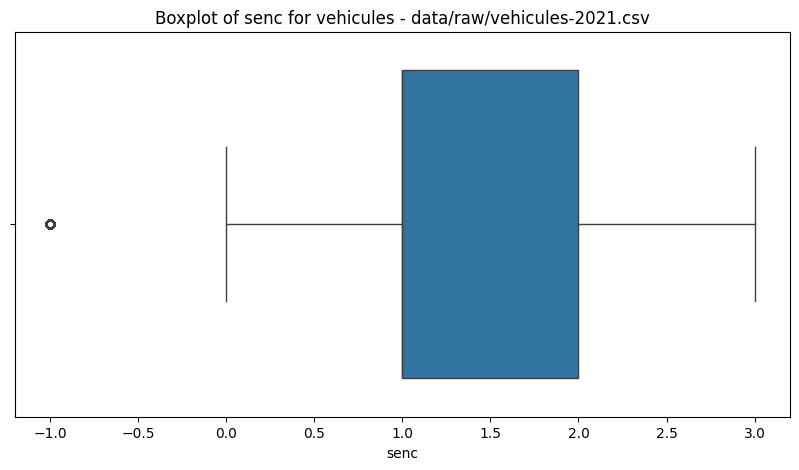

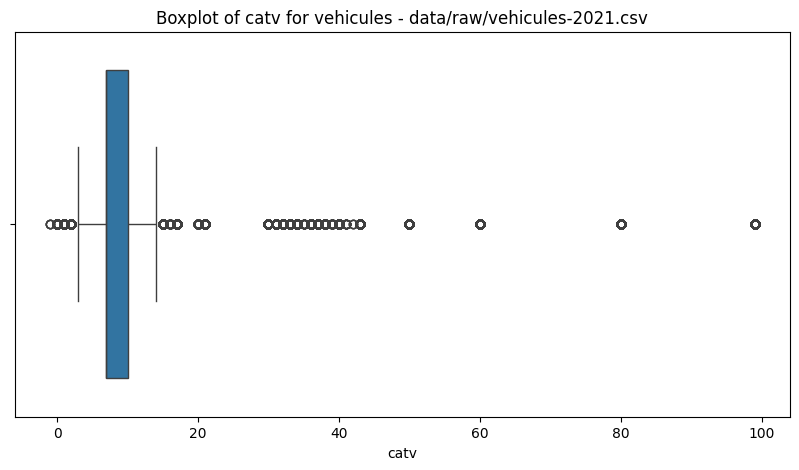

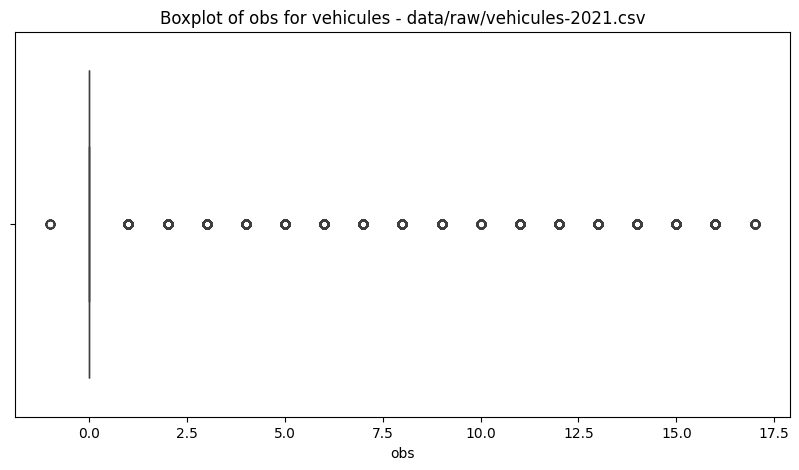

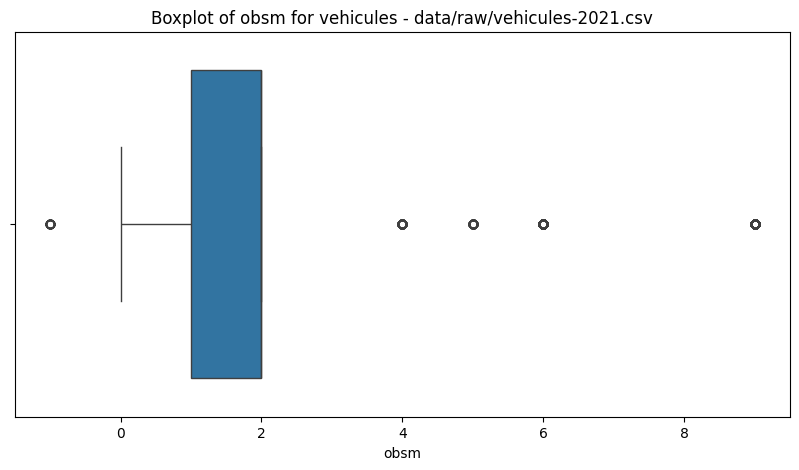

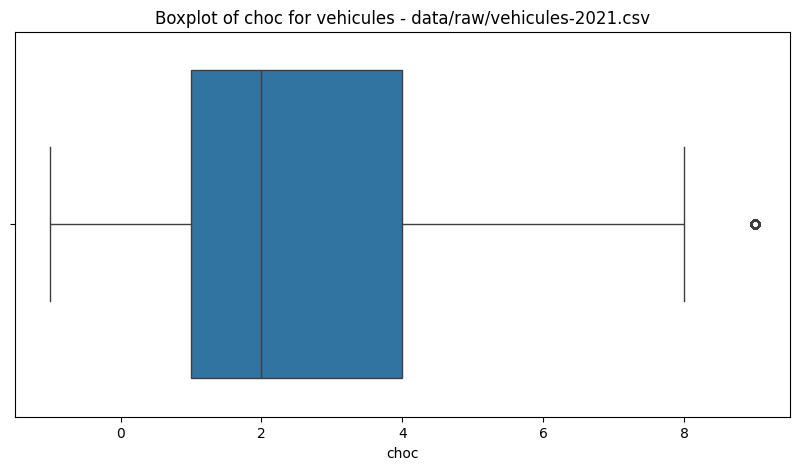

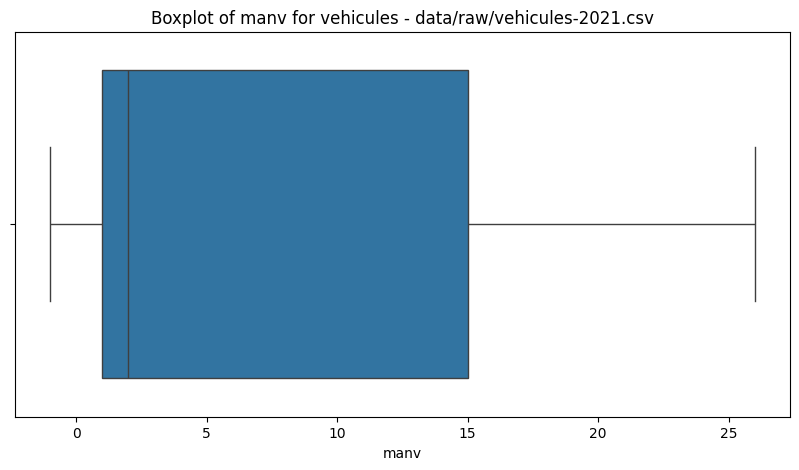

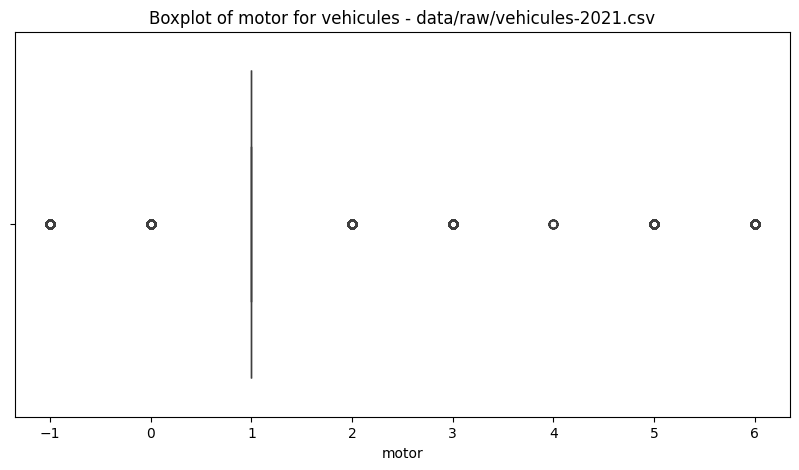

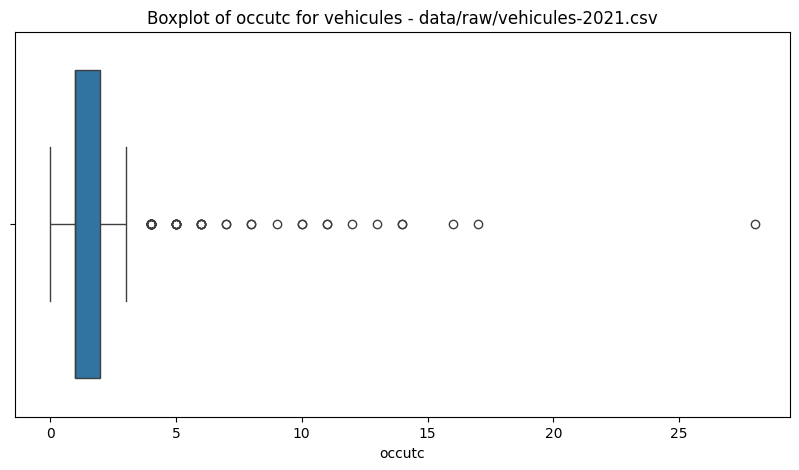

Categorical Analysis for vehicules - data/raw/vehicules-2022.csv
+-------------+---------+-----------------+--------------+---------------+
| Column      | Dtype   |   Unique Values |   Duplicates |   Null Values |
+=============+=========+=================+==============+===============+
| id_vehicule | object  |           94493 |            0 |             0 |
+-------------+---------+-----------------+--------------+---------------+
| num_veh     | object  |              47 |        94446 |             0 |
+-------------+---------+-----------------+--------------+---------------+


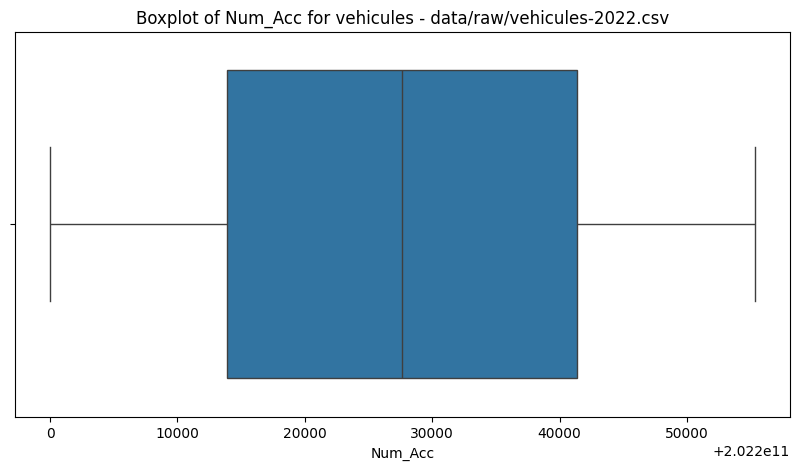

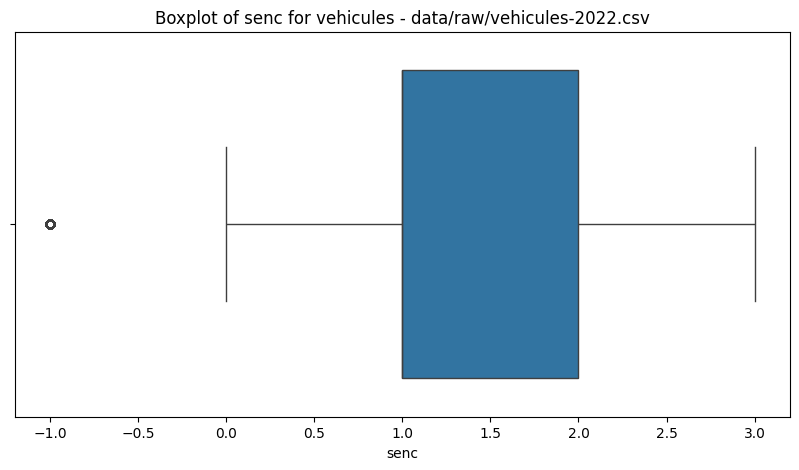

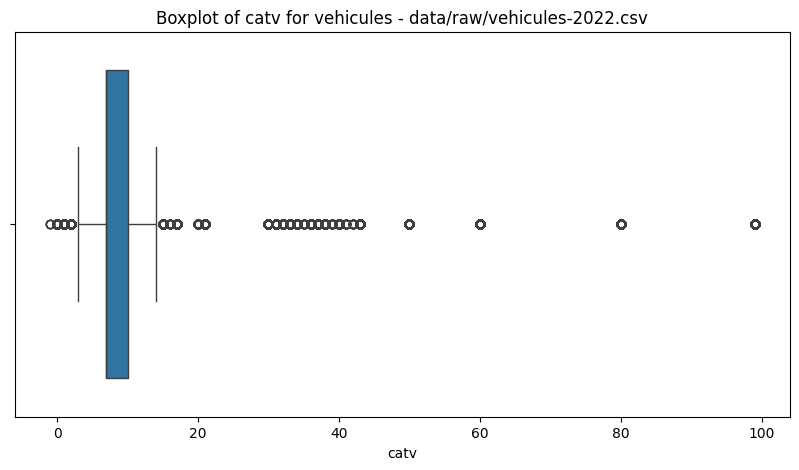

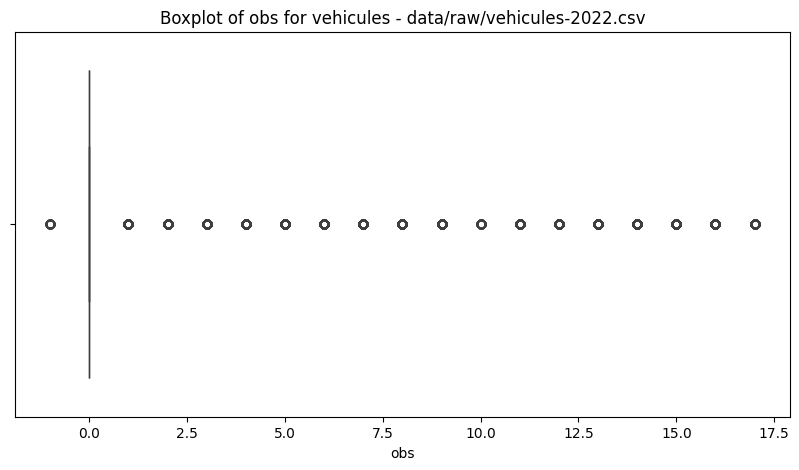

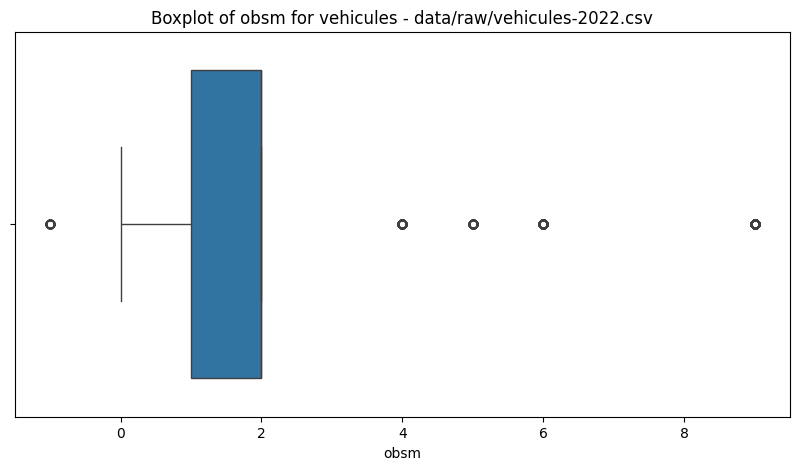

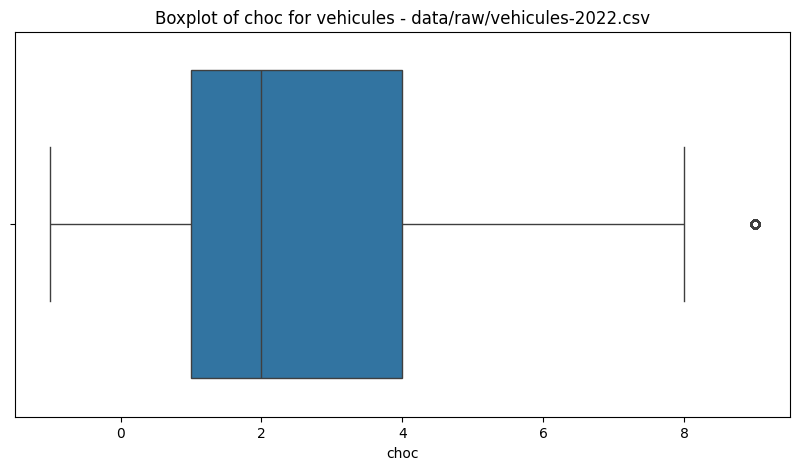

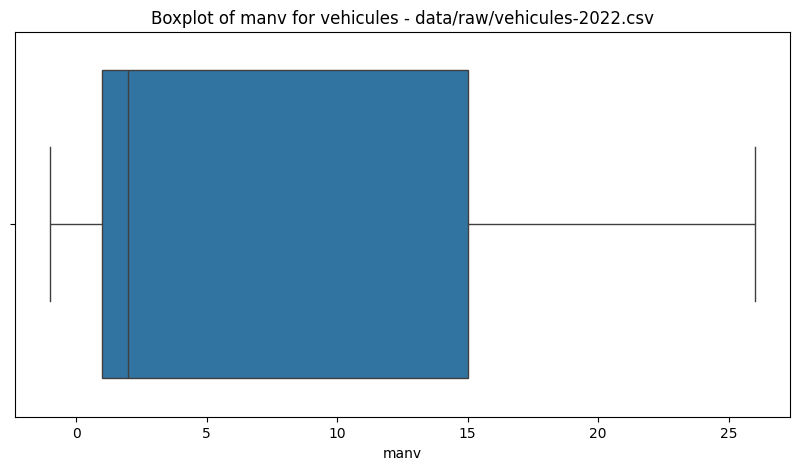

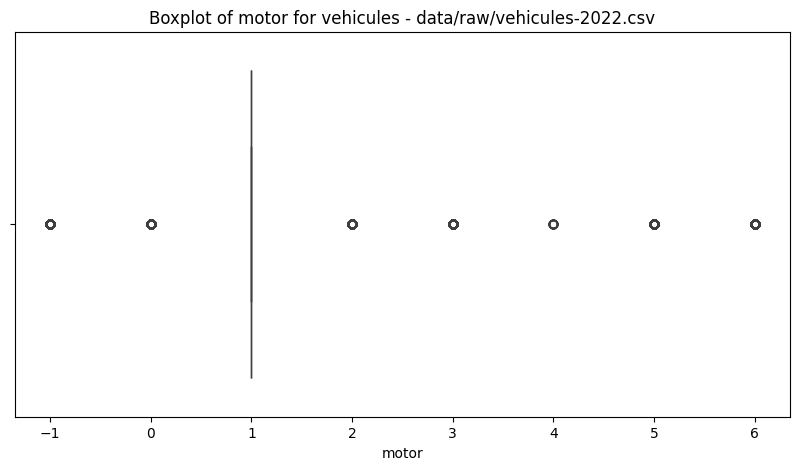

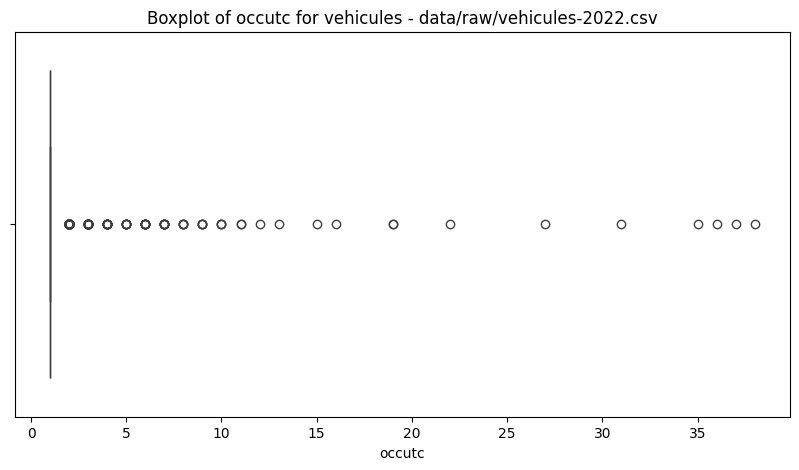

KeyError: 'data/raw/vehicules_2005.csv'

In [9]:
def analyze_categorical(df, year, prefix):
    result = []
    for col in df.select_dtypes(include=['object', 'category']):
        col_data = df[col]
        unique_vals = col_data.nunique()
        null_vals = col_data.isnull().sum()
        duplicates = col_data.duplicated().sum()
        result.append([col, col_data.dtype, unique_vals, duplicates, null_vals])
    
    print(f"Categorical Analysis for {prefix} - {year}")
    print(tabulate(result, headers=['Column', 'Dtype', 'Unique Values', 'Duplicates', 'Null Values'], tablefmt='grid'))

def analyze_categorical_distribution(datasets, prefix):
    for col in datasets[0].keys():
        distribution_data = []
        for dataset in datasets:
            for year, df in dataset.items():
                value_counts = df[col].value_counts(dropna=False).to_dict()
                total_count = df[col].shape[0]
                missing_prop = df[col].isnull().mean()
                value_counts['missing'] = missing_prop
                distribution_data.append([year] + list(value_counts.values()))
        
        headers = ['Year'] + list(value_counts.keys())
        print(f"Distribution of {col} for {prefix}")
        print(tabulate(distribution_data, headers=headers, tablefmt='grid'))

def analyze_continuous(df, year, prefix):
    for col in df.select_dtypes(include=['float64', 'int64']):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col} for {prefix} - {year}")
        plt.xlabel(col)
        plt.show()

def analyze_all_datasets(dataframes):
    for prefix, datasets in zip(prefixes, dataframes):
        for dataset in datasets:
            for year, df in dataset.items():
                analyze_categorical(df, year, prefix)
                analyze_continuous(df, year, prefix)
        analyze_categorical_distribution(datasets, prefix)

# Run the analysis
analyze_all_datasets(dataframes)